In [1]:
### EDA Assignment

# Author       : Santosh Kulkarni
# email        : mr.santosh.kulkarni@gmail.com
# Contact      : +91-9920019910

# Exploratory Data Analysis 
    1.0 Basic Data Exploration (Load data, check data info)
    2.0 Data priliminary check (Check and treat Missing values)
    3.0 Data cleaning (Check data distribution, Remove duplicates, Drop singular and high missing value columns, remove outliers)
    4.0 Variables Analysis (Univariate & Bivariate Analysis, feature selection, drop corelated columns)
    5.0 Encoding Categorical variables 
    6.0 Data Treatment (Normalizing and Scaling)
    7.0 EDA summary and Model data set preperation

## 1.0 Basic Data Exploration (Load data, check data info)

In [2]:
# E1.1 Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# E1.2 read data file and import data to DF
df_train = pd.read_csv("/Users/snehakulkarni/Desktop/santosh/Learnbay/data/HR_Employee_Attrition_Data.csv")
df_train.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   
5                 2          2  Life Sciences              1               6   
6                 3          3        Medical              1               7   
7                24          1  Life Sciences              1               8   
8                23          3  Life Sciences              1               9   
9                27          3        Medical              1              10   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

## 2.0 Data priliminary check (Check and treat missing values)

In [4]:
# E2.1 check missing values
total=df_train.isnull().sum().sort_values(ascending=False)
percent= (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(15)

Total  Percent
YearsWithCurrManager         0      0.0
EmployeeCount                0      0.0
JobLevel                     0      0.0
JobInvolvement               0      0.0
HourlyRate                   0      0.0
Gender                       0      0.0
EnvironmentSatisfaction      0      0.0
EmployeeNumber               0      0.0
EducationField               0      0.0
JobSatisfaction              0      0.0
Education                    0      0.0
DistanceFromHome             0      0.0
Department                   0      0.0
DailyRate                    0      0.0
BusinessTravel               0      0.0

### 2.0 Data priliminary check : Findings summary
    ####  F2.0 No missing data / Null values found.
### -------------x--------------x------------------x---------------x---------------x---------------x-------------x----------------x-

## 3.0   Data cleaning (Check data distribution, Remove duplicates, Drop singular and high missing value columns, remove outliers)

In [5]:
# E3.1 Check for number of unique values for each column.
df_train.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
# Finding:
# F3.1.1 Performance rating shows only 2 unique values against expected scale of 1-5  
    #- Bias need to be further investigated
# F3.1.2 Daily rate- hourly rate - monthly rate values 886-71-1427 need to check for inconsistency
# F3.1.3 EmployeeCount, Over18, StandardHours, have only single value.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

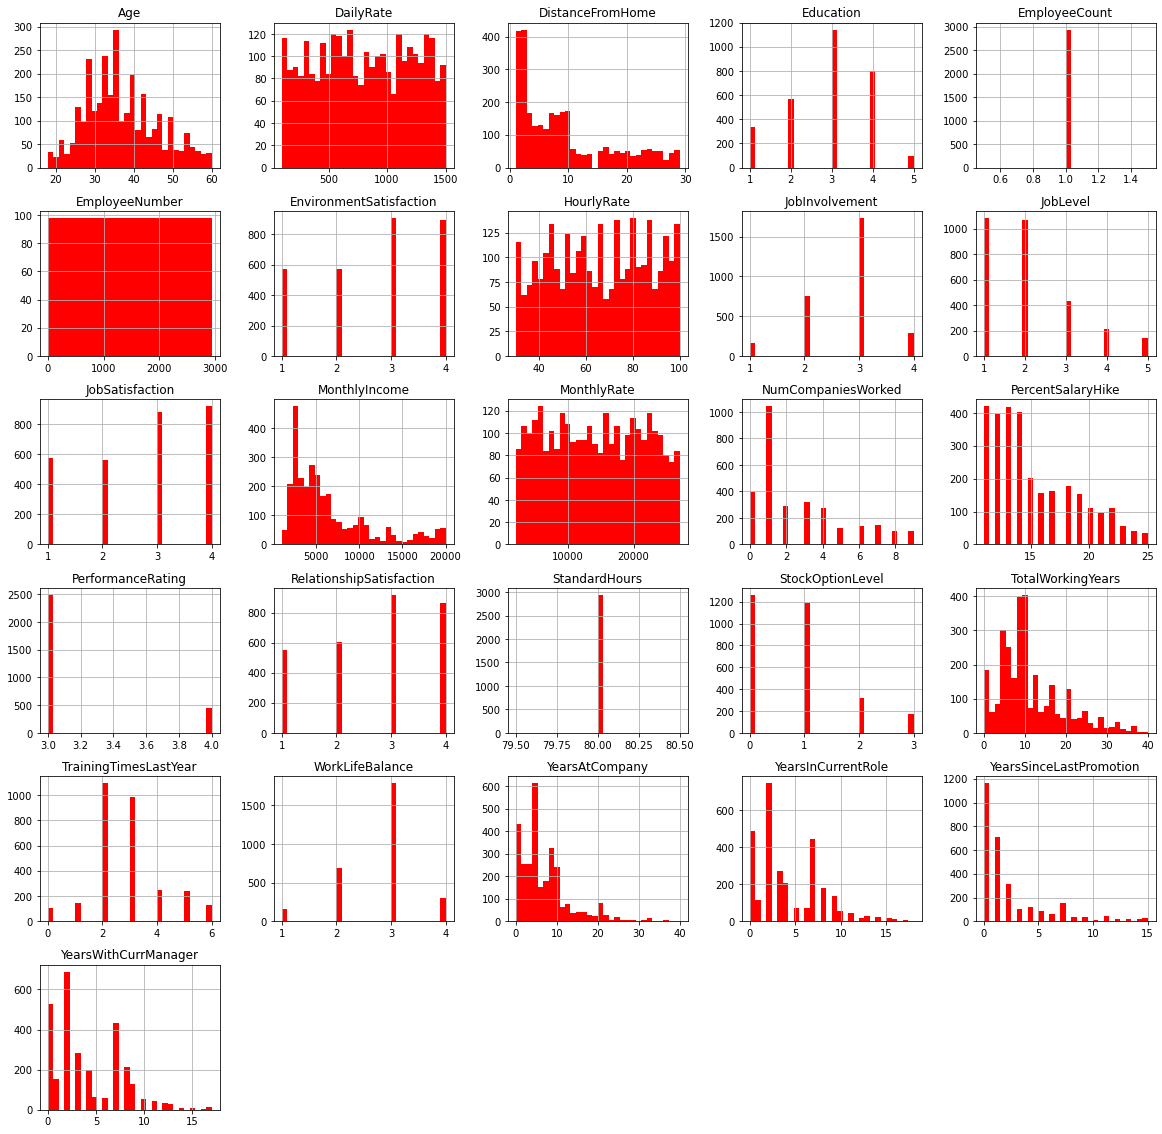

In [7]:
# E3.2 Data Visualization - looking at the shape of distribution.
df_train.hist(bins = 30, figsize = (20,20), color = 'r')

In [8]:
# Finding:
# F3.2.1 drop 'EmployeeCount' , 'Standardhours' and 'Over18' since there is no variation
# F3.2.2 drop 'EmployeeNumber' as it is identifier and not feature/variable wrt target
# F3.2.3 Distancefromhome, YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 
    # are long tailed. check for outliers

In [9]:
# E3.3 Describe columns and understand basic statistical information.
temp1 = None
temp1 = pd.DataFrame({
    "Minimum Value": df_train.min(), 
    "P05 Value": df_train.quantile(0.05), 
    "Median Values": df_train.median(), 
    "Mean Values": df_train.mean(), 
    "P95 Values": df_train.quantile(0.95),
    "Max Value": df_train.max(), 
    "Standard Deviation": df_train.std(),
    "Skewness": df_train.skew() 
})

# Sort values based on skewness
temp1 = temp1.sort_values(by='Skewness')

temp1.head(50)

Minimum Value  P05 Value  Median Values  \
WorkLifeBalance                                   1       1.00            3.0   
JobInvolvement                                    1       1.00            3.0   
JobSatisfaction                                   1       1.00            3.0   
EnvironmentSatisfaction                           1       1.00            3.0   
RelationshipSatisfaction                          1       1.00            3.0   
Education                                         1       1.00            3.0   
HourlyRate                                       30      33.00           66.0   
DailyRate                                       102     164.00          802.0   
EmployeeCount                                     1       1.00            1.0   
EmployeeNumber                                    1     147.95         1470.5   
StandardHours                                    80      80.00           80.0   
MonthlyRate                                    2094    3376.00        14235.5   
Age                                              18      24.00           36.0   
TrainingTimesLastYear                             0       1.00            3.0   
PercentSalaryHike                                11      11.00           14.0   
YearsWithCurrManager                              0       0.00            3.0   
YearsInCurrentRole                                0       0.00            3.0   
DistanceFromHome                                  1       1.00            7.0   
StockOptionLevel                                  0       0.00            1.0   
JobLevel                                          1       1.00            2.0   
NumCompaniesWorked                                0       0.00            2.0   
TotalWorkingYears                                 0       1.00           10.0   
MonthlyIncome                                  1009    2097.00         4919.0   
YearsAtCompany                                    0       1.00            5.0   
PerformanceRating                                 3       3.00            3.0   
YearsSinceLastPromotion                           0       0.00            1.0   
Attrition                                        No        NaN            NaN   
BusinessTravel                           Non-Travel        NaN            NaN   
Department                          Human Resources        NaN            NaN   
EducationField                      Human Resources        NaN            NaN   
Gender                                       Female        NaN            NaN   
JobRole                   Healthcare Representative        NaN            NaN   
MaritalStatus                              Divorced        NaN            NaN   
Over18                                            Y        NaN            NaN   
OverTime                                         No        NaN            NaN   

                           Mean Values  P95 Values             Max Value  \
WorkLifeBalance               2.761224        4.00                     4   
JobInvolvement                2.729932        4.00                     4   
JobSatisfaction               2.728571        4.00                     4   
EnvironmentSatisfaction       2.721769        4.00                     4   
RelationshipSatisfaction      2.712245        4.00                     4   
Education                     2.912925        4.00                     5   
HourlyRate                   65.891156       97.00                   100   
DailyRate                   802.485714     1425.00                  1499   
EmployeeCount                 1.000000        1.00                     1   
EmployeeNumber             1470.500000     2793.05                  2940   
StandardHours                80.000000       80.00                    80   
MonthlyRate               14313.103401    25440.00                 26999   
Age                          36.923810       54.00                    60   
TrainingTimesLastYear         2.799320        5.00       

In [10]:
# Finding:
# F3.3 Outliers seen in MonthlyIncome, YearsAtCompany, YearsSinceLastPromotion. Need to cross check

In [11]:
# E3.4 Checking if DailyRate, HourlyRate and MonthlyRate are similar or arithmatic derivative.
cols=['HourlyRate','DailyRate','MonthlyRate', 'MonthlyIncome','Attrition']
df_train[cols].head()

HourlyRate  DailyRate  MonthlyRate  MonthlyIncome Attrition
0          94       1102        19479           5993       Yes
1          61        279        24907           5130        No
2          92       1373         2396           2090       Yes
3          56       1392        23159           2909        No
4          40        591        16632           3468        No

In [12]:
df_train[df_train.Attrition.isin(["Yes"])][cols].head()

HourlyRate  DailyRate  MonthlyRate  MonthlyIncome Attrition
0           94       1102        19479           5993       Yes
2           92       1373         2396           2090       Yes
14          50        103        12947           2028       Yes
21          82       1218         6986           3407       Yes
24          83        699        17102           2960       Yes

In [13]:
# Finding:
# F3.4 need to check if low monthly income is a factor for attrition

In [14]:
# E3.5 Describing columns with categorical values to check distribution of data.
print("\nGender classification:",df_train.Gender.value_counts(),sep = '\n')
print("\nBusiness Travel:",df_train.BusinessTravel.value_counts(),sep = '\n')
print("\nDepartments:",df_train.Department.value_counts(),sep = '\n')
print("\nEducational Field:",df_train.EducationField.value_counts(),sep = '\n')
print("\nJob Roles:",df_train.JobRole.value_counts(),sep = '\n')
print("\nWork Life Balance:",df_train.WorkLifeBalance.value_counts(),sep = '\n')
#print("\nJobInvolvement:",df_train.JobInvolvement.value_counts(),sep = '\n')
#print("\nJobSatisfaction:",df_train.JobSatisfaction.value_counts(),sep = '\n')
#print("\nEnvironmentSatisfaction:",df_train.EnvironmentSatisfaction.value_counts(),sep = '\n')
#print("\nRelationshipSatisfaction:",df_train.RelationshipSatisfaction.value_counts(),sep = '\n')


Gender classification:
Male      1764
Female    1176
Name: Gender, dtype: int64

Business Travel:
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Departments:
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

Educational Field:
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Job Roles:
Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

Work Life Balance:
3    1786
2     688
4     306
1     160
Name: WorkLifeBalance, dtype: int64


In [15]:
# Finding:
### F3.5.1 "Employee count", "over 18" and "Standard hours" have no variation or single value and can be dropped
### F3.5.2 Can Drop 'Employee Number" as it is unique identifier 

### 3.0 Data cleaning (Check data distribution, Remove duplicates, Drop singular and high missing value columns, remove outliers): Findings summary
    F3.1.1 Performance rating shows only 2 unique values against expected scale of 1-5.Bias need to be further investigated
    F3.1.2 Daily rate- hourly rate - monthly rate values 886 , 71 , 1427 need to check for inconsistency
    F3.1.3 EmployeeCount, Over18, StandardHours, have only single value.
    F3.2.1 drop 'EmployeeCount' , 'Standardhours' and 'Over18' since there is no variation
    F3.2.2 drop 'EmployeeNumber' as it is identifier and not feature/variable wrt target
    F3.2.3 Distancefromhome, YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager are long tailed. check for outliers
    F3.3 Outliers seen in MonthlyIncome, YearsAtCompany, YearsSinceLastPromotion. Need to cross check
    F3.4 need to check if low monthly income is a factor for attrition
    F3.5.1 "Employee count", "over 18" and "Standard hours" have no variation or single value and can be dropped
    F3.5.2 Can Drop 'Employee Number" as it is unique identifier
x-------------x--------------x------------------x---------------x---------------x--------------x----------------x----------------x------------------x---------------x

##     4.0 Variables Analysis (Univariate & Bivariate Analysis, feature selection, drop corelated columns)

Index(['Age', 'TotalWorkingYears', 'JobLevel', 'MonthlyIncome',
       'YearsAtCompany', 'NumCompaniesWorked', 'YearsSinceLastPromotion',
       'YearsInCurrentRole', 'Education', 'YearsWithCurrManager',
       'RelationshipSatisfaction'],
      dtype='object')


<AxesSubplot:>

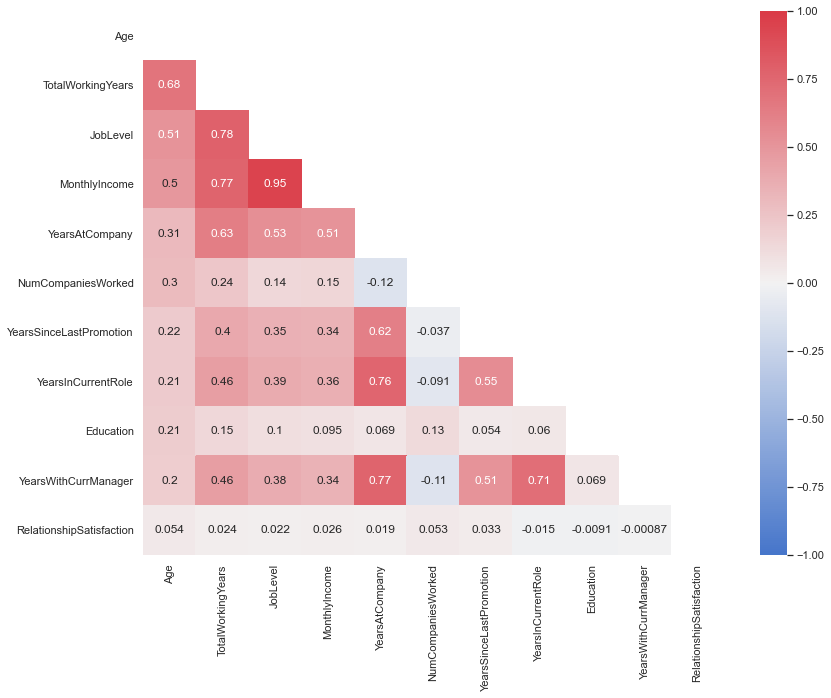

In [16]:
# E4.1 check correlation between columns. filter top 10
corrmat=df_train.corr()
k=11
cols=corrmat.nlargest(k, 'Age')['Age'].index
#cm=np.corrcoef(contact_df[cols].values.T)
print(cols)
df_top10 = df_train.loc[:,cols].corr()
sns.set(style="white")
mask = np.zeros_like(df_train.loc[:,cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df_top10, mask=mask, annot=True,
            cmap=cmap , vmin=-1, vmax=1, ax=ax, yticklabels=cols.values, xticklabels=cols.values)

In [17]:
# Findings:
# F4.1.1 Job level is strongly correlated with total working hours
# F4.1.2 Monthly income is strongly correlated with Job level
# F4.1.3 Monthly income is strongly correlated with total working hours
# F4.1.4 Age is strongly correlated with monthly income

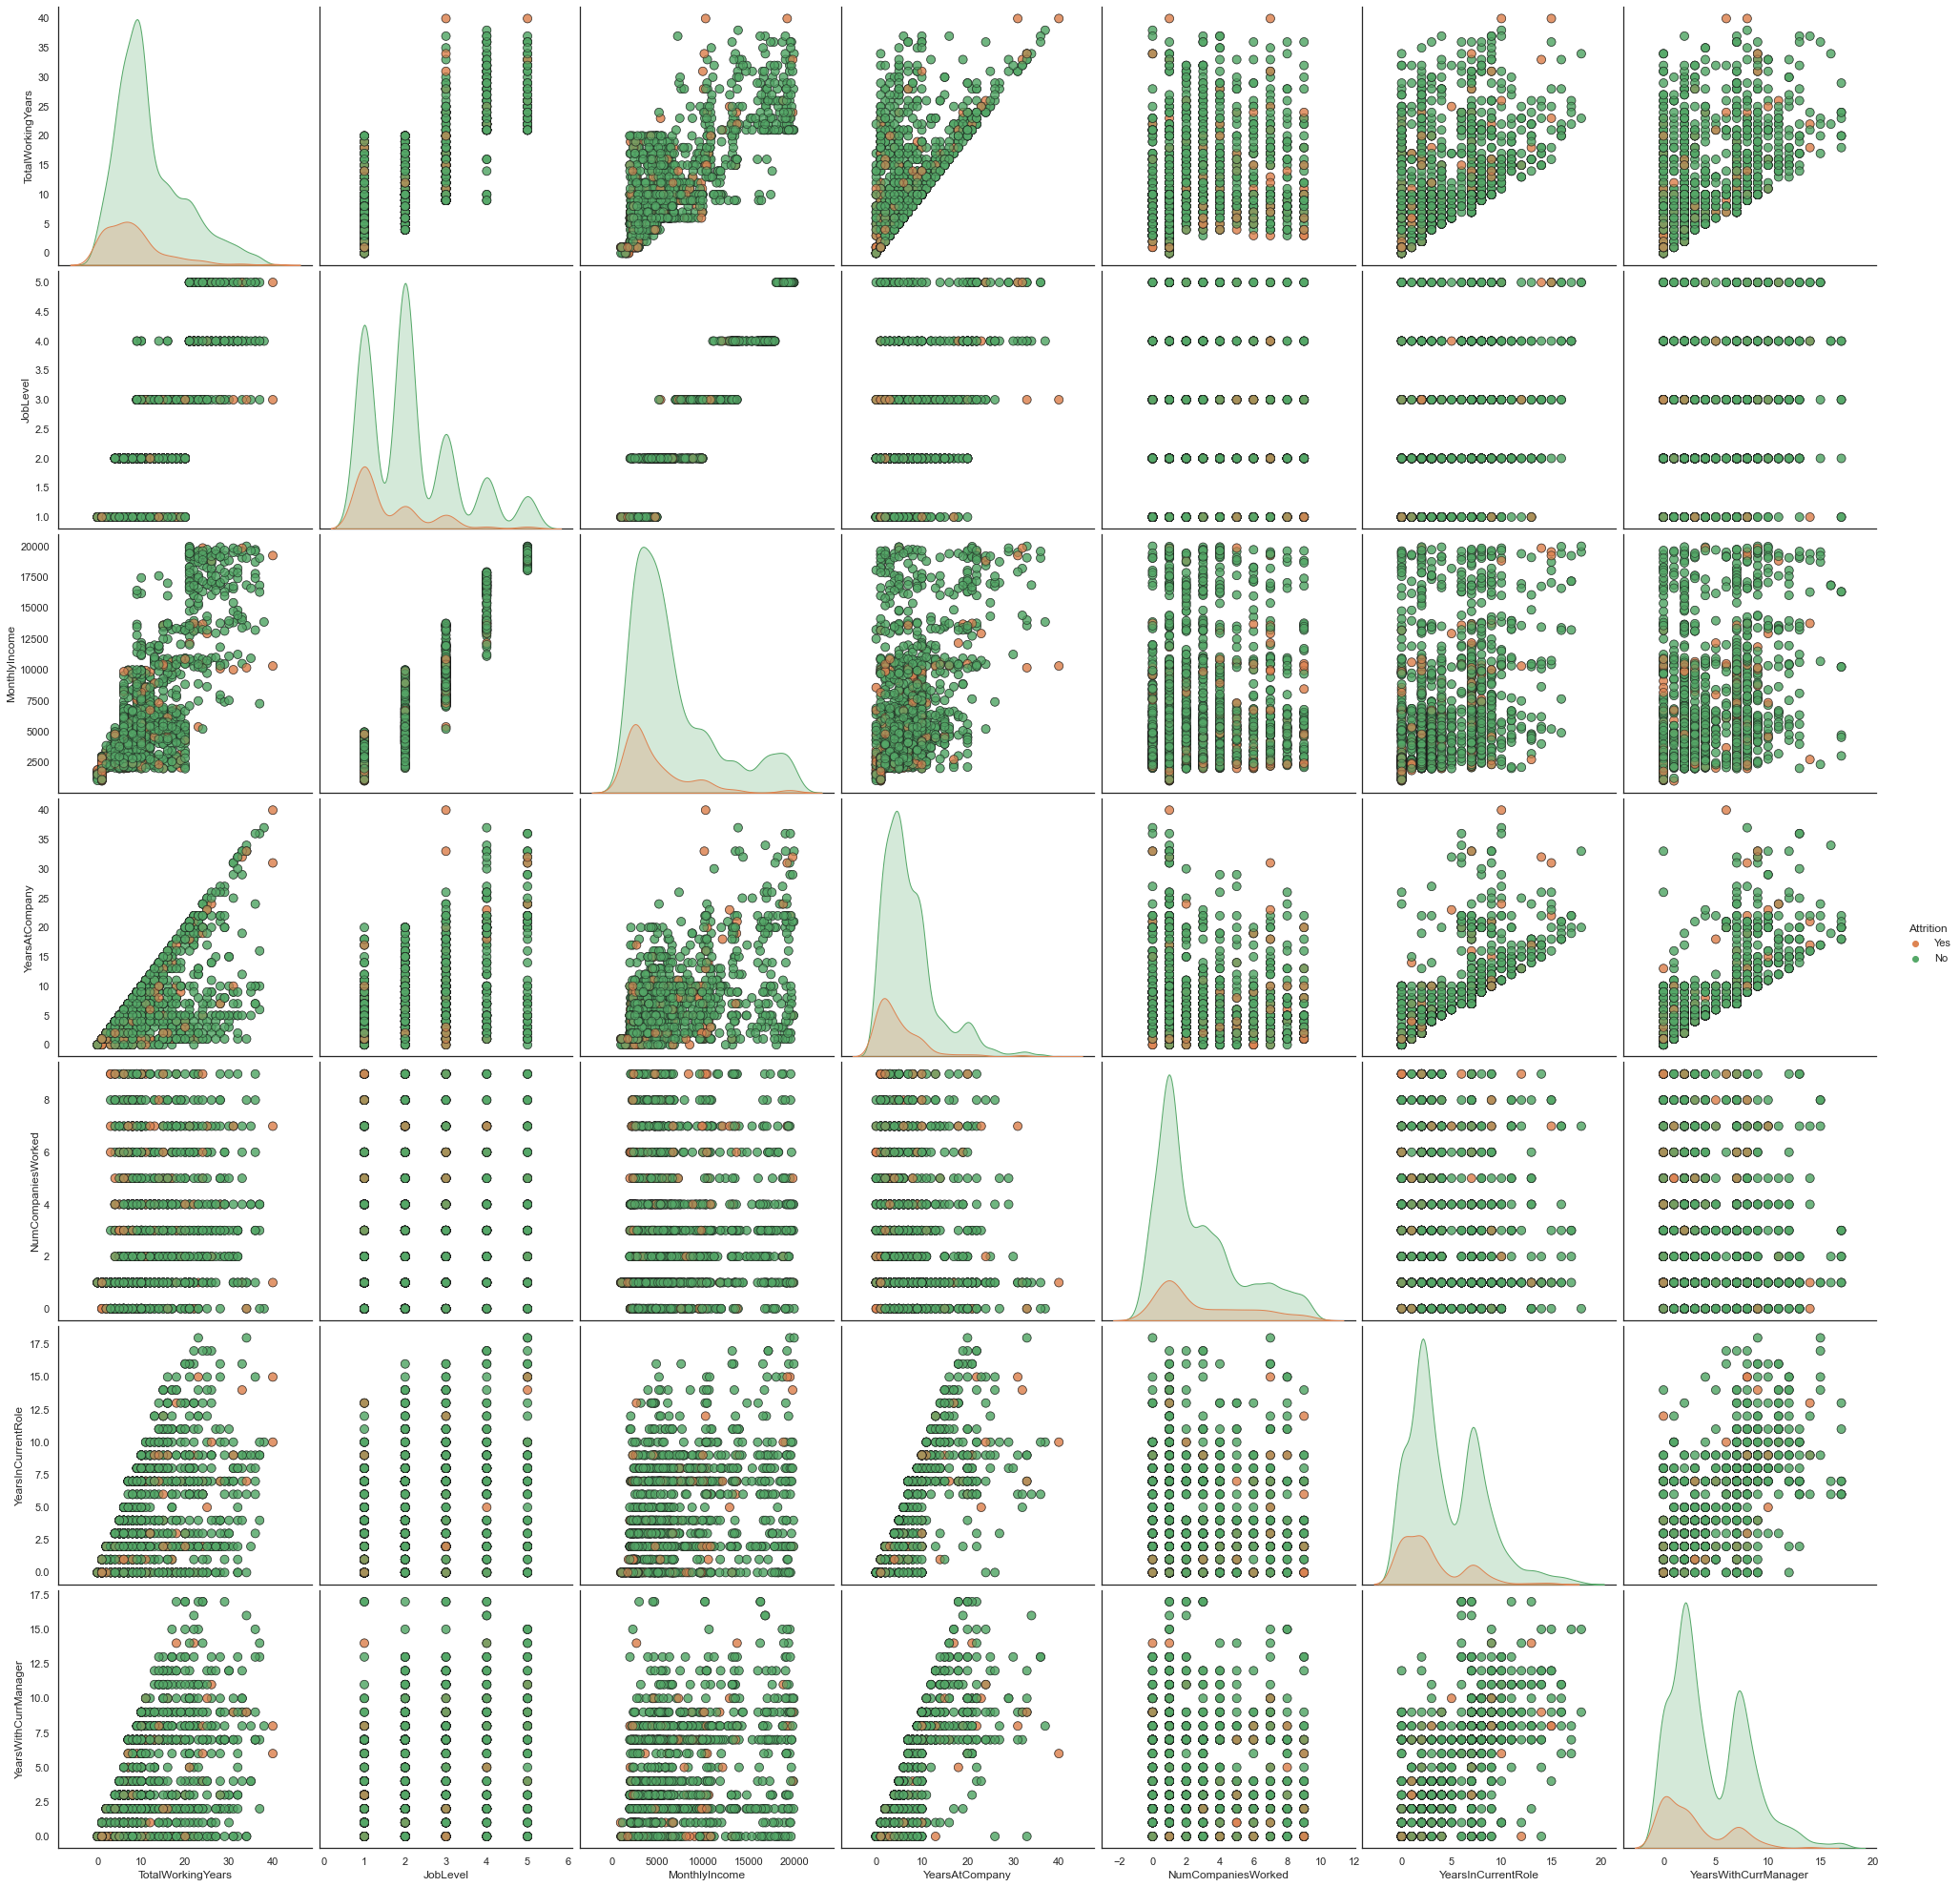

In [18]:
# E4.2 Check scatter plot for patterns in correlated variables
sns.set()
cols = ['TotalWorkingYears', 'JobLevel', 'MonthlyIncome',
       'YearsAtCompany', 'NumCompaniesWorked',
       'YearsInCurrentRole', 'YearsWithCurrManager','Attrition']
sns.set(style="white")
sns.pairplot(df_train[cols], hue = 'Attrition', diag_kind = 'kde',palette=["C1", "C2"],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [19]:
# Findings:
# F4.2.1 "Job level" and "Monthlyincome" highly correlated. Can Drop one column
# F4.2.2 Can Drop "years at company" - correlated with "years at current role" and "years with currmanager"
# F4.2.3 Check total working years and  monthly income  correlation
# F4.2.4 Check salary hike and performance rating correlation
# F4.2.5 Check years with current manager and  years since last promotion correlation 
# F4.2.6 Check age and monthly income correlation

In [20]:
#f,ax=plt.subplots(figsize=(18,18))
#sns.heatmap(df_train.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
#plt.show()

In [21]:
# E4.3 Drop single variable columns.
df_train.drop(columns=["Over18","EmployeeCount", "StandardHours", "EmployeeNumber"], inplace=True)
df_train.shape

(2940, 31)

In [22]:
# Finding:
# F4.4.1 If use 'Accuracy' as a performance metric for Attrition then even if all cases are predicted as 0, still model will have 84% accuracy!! prediction of 1 as 1 will be important here.
# F4.4.2 make sure that the 80:20 split has 84% of ‘0’s and 16% of ‘1’s in both output datasets
# F4.4.3 Use stratified sample split for train & test data. specify Stratified for cross validation (StratifiedKFold)

In [23]:
### E4.5 (E5.0 & E6.0) Encode columns with categorical values: Encoded columns Attrition, Gender, BusinessTravel, Department, EducationField, MaritalStatus, OverTime, JobRole

In [24]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    return res_df

In [25]:
encoded_df = preprocessor(df_train)
# use encoded_df for further analysis

In [26]:
### F6.0 Normalized columns Attrition, Gender, BusinessTravel, Department, EducationField, MaritalStatus, OverTime, JobRole

In [27]:
### F5.0 Encoded columns Attrition, Gender, BusinessTravel, Department, EducationField, MaritalStatus, OverTime, JobRole

In [28]:
## E4.4 Check if Target variable is biased or skewed

In [29]:
print('Encoded Gender Values: ' + str(encoded_df.Gender.unique()))
print('Encoded EducationField Values: ' + str(encoded_df.EducationField.unique()))
print('Encoded Department Values: ' + str(encoded_df.Department.unique()))
print('Encoded MaritalStatus Values: ' + str(encoded_df.MaritalStatus.unique()))
print('Encoded OverTime Values: ' + str(encoded_df.OverTime.unique()))
print('Encoded BusinessTravel Values: ' + str(encoded_df.BusinessTravel.unique()))
print('Encoded JobRole Values: ' + str(encoded_df.JobRole.unique()))

Encoded Gender Values: [0 1]
Encoded EducationField Values: [1 4 3 2 5 0]
Encoded Department Values: [2 1 0]
Encoded MaritalStatus Values: [2 1 0]
Encoded OverTime Values: [1 0]
Encoded BusinessTravel Values: [2 1 0]
Encoded JobRole Values: [7 6 2 4 0 3 8 5 1]


Percentage of NO Values: 83.87755102040816
Percentage of YES Values: 16.122448979591837


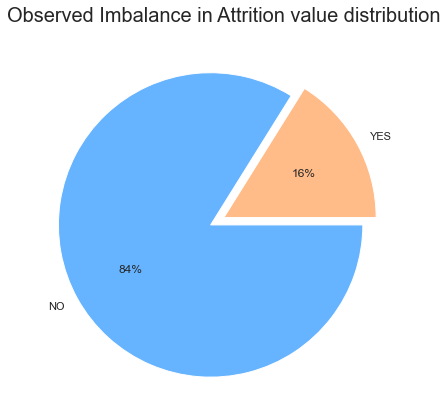

In [30]:
total_rows = encoded_df.shape[0]
no_val = encoded_df.Attrition.value_counts()[0]
yes_val = encoded_df.Attrition.value_counts()[1]
print('Percentage of NO Values: ' + str((no_val/total_rows) * 100))
print('Percentage of YES Values: ' + str((yes_val/total_rows) * 100))

plt.figure(figsize = (7, 7))
plt.pie([yes_val, no_val], labels=['YES', 'NO'], 
        autopct='%1.0f%%', colors = ['#ffbb88','#66b3ff'], explode = (0, 0.1,) )
plt.title("Observed Imbalance in Attrition value distribution", fontsize=20)
plt.show()

In [31]:
# E4.6 splitting DF into 2 based on Attrition type Yes-No. to be used for further analysis
e_df_attrited = encoded_df[encoded_df['Attrition'] == 1]
e_df_stayed = encoded_df[encoded_df['Attrition'] == 0]

In [32]:
# checking split
print("Total =", len(encoded_df))
print("Number of employees who attrited =", len(e_df_attrited))
#print("Percentage of employees who left the company =", len(e_df_attrited)/len(encoded_df)*100.0, "%")
print("Number of employees who stayed =", len(e_df_stayed))
#print("Percentage of employees who stayed =",len(e_df_stayed)/len(encoded_df)*100.0, "%")

Total = 2940
Number of employees who attrited = 474
Number of employees who stayed = 2466


In [33]:
e_df_attrited.describe()

Age  Attrition  BusinessTravel    DailyRate  Department  \
count  474.000000      474.0      474.000000   474.000000  474.000000   
mean    33.607595        1.0        1.607595   750.362869    1.337553   
std      9.679102        0.0        0.583444   401.474454    0.570582   
min     18.000000        1.0        0.000000   103.000000    0.000000   
25%     28.000000        1.0        1.000000   408.000000    1.000000   
50%     32.000000        1.0        2.000000   699.000000    1.000000   
75%     39.000000        1.0        2.000000  1092.000000    2.000000   
max     58.000000        1.0        2.000000  1496.000000    2.000000   

       DistanceFromHome   Education  EducationField  EnvironmentSatisfaction  \
count        474.000000  474.000000      474.000000               474.000000   
mean          10.632911    2.839662        2.329114                 2.464135   
std            8.443586    1.007178        1.434001                 1.168554   
min            1.000000    1.000000        0.000000                 1.000000   
25%            3.000000    2.000000        1.000000                 1.000000   
50%            9.000000    3.000000        2.000000                 3.000000   
75%           17.000000    4.000000        3.000000                 4.000000   
max           29.000000    5.000000        5.000000                 4.000000   

           Gender  ...  PerformanceRating  RelationshipSatisfaction  \
count  474.000000  ...         474.000000                474.000000   
mean     0.632911  ...           3.156118                  2.599156   
std      0.482520  ...           0.363351                  1.124247   
min      0.000000  ...           3.000000                  1.000000   
25%      0.000000  ...           3.000000                  2.000000   
50%      1.000000  ...           3.000000                  3.000000   
75%      1.000000  ...           3.000000                  4.000000   
max      1.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        474.000000         474.000000             474.000000   
mean           0.527426           8.244726               2.624473   
std            0.855456           7.161621               1.253457   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       474.000000      474.000000          474.000000   
mean          2.658228        5.130802            2.902954   
std           0.815589        5.943691            3.171469   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               474.000000            474.000000  
mean                  1.945148              2.852321  
std                   3.149742              3.140024  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   1.000000              2.000000  
75%                   2.000000              5.000000  
max                  15.000000             14.000000  

[8 rows x 31 columns]

In [34]:
e_df_stayed.describe()

Age  Attrition  BusinessTravel    DailyRate   Department  \
count  2466.000000     2466.0     2466.000000  2466.000000  2466.000000   
mean     37.561233        0.0        1.607461   812.504461     1.245742   
std       8.886557        0.0        0.680062   403.126584     0.517867   
min      18.000000        0.0        0.000000   102.000000     0.000000   
25%      31.000000        0.0        1.000000   477.000000     1.000000   
50%      36.000000        0.0        2.000000   817.000000     1.000000   
75%      43.000000        0.0        2.000000  1176.000000     2.000000   
max      60.000000        0.0        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       2466.000000  2466.000000     2466.000000              2466.000000   
mean           8.915653     2.927007        2.231955                 2.771290   
std            8.011008     1.026793        1.310176                 1.070915   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           13.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender  ...  PerformanceRating  RelationshipSatisfaction  \
count  2466.000000  ...        2466.000000               2466.000000   
mean      0.593674  ...           3.153285                  2.733982   
std       0.491246  ...           0.360335                  1.071386   
min       0.000000  ...           3.000000                  1.000000   
25%       0.000000  ...           3.000000                  2.000000   
50%       1.000000  ...           3.000000                  3.000000   
75%       1.000000  ...           3.000000                  4.000000   
max       1.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       2466.000000        2466.000000            2466.000000   
mean           0.845093          11.862936               2.832928   
std            0.841814           7.759145               1.293323   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      2466.000000     2466.000000         2466.000000   
mean          2.781022        7.369019            4.484185   
std           0.681768        6.095061            3.648662   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              2466.000000           2466.000000  
mean                  2.234388              4.367397  
std                   3.234106              3.593387  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 31 columns]

In [35]:
# E4.7 Univariate analysis
# Age, Percentsalaryhike, Distancefromhome, jobrole, Maritalstatus, jobinvolvement, joblevel

In [36]:
# E4.7.1 Check impact of Age on Attrition

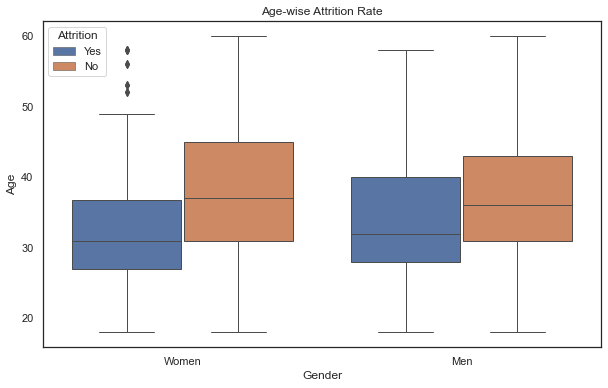

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.Age, hue=df_train.Attrition, linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('Age-wise Attrition Rate')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

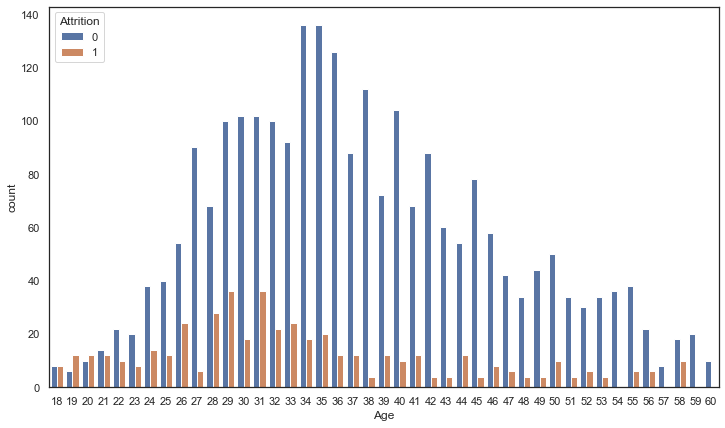

In [38]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'Age', hue = 'Attrition', data = encoded_df)

Text(0.5, 0, 'Age')

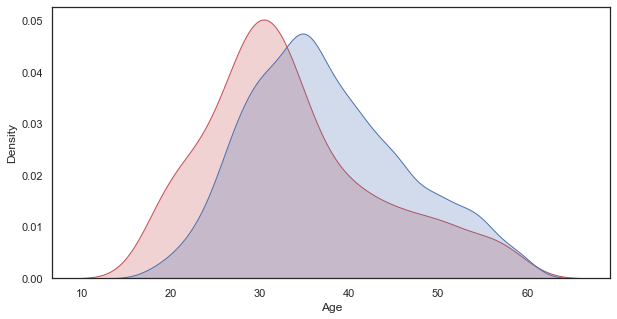

In [39]:
plt.figure(figsize=(10,5))

sns.kdeplot(e_df_attrited['Age'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(e_df_stayed['Age'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Age')

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

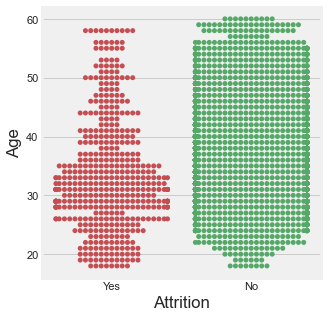

In [40]:
plt.figure(figsize = (5,5))
plt.style.use('fivethirtyeight')
#plt.subplot(131)
sns.swarmplot(x="Attrition", y="Age", palette=["r", "g"], data=df_train)

In [41]:
# Finding:
# F4.7.1.1 mean age of the employees who attrited is lower compared to who did not attrite
# F4.7.1.2 Employees within the age band of 25-35 attrited at a huge rate
# F4.7.1.3 No significant difference in Male/Female gender behavior, they tend to behave same

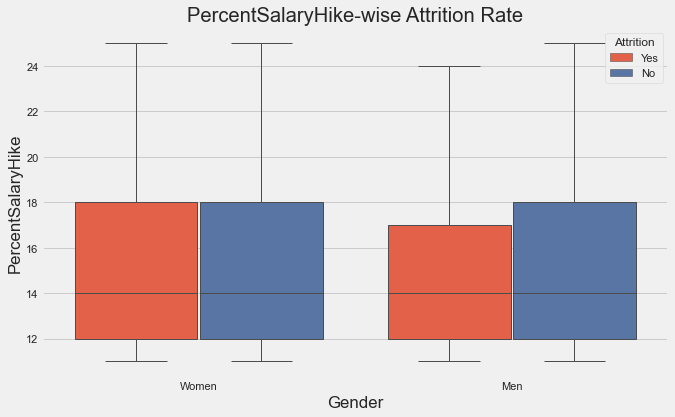

In [42]:
# E4.7.2 Check impact of Percentsalaryhike 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.PercentSalaryHike, hue=df_train.Attrition, palette=["C1", "b"],linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('PercentSalaryHike-wise Attrition Rate')
plt.show()

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

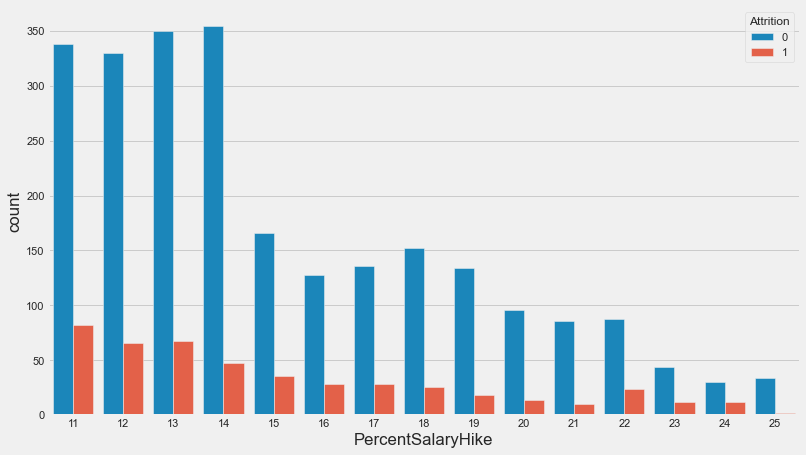

In [43]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'PercentSalaryHike', hue = 'Attrition', data = encoded_df)

Text(0.5, 0, 'Percent Salary Hike')

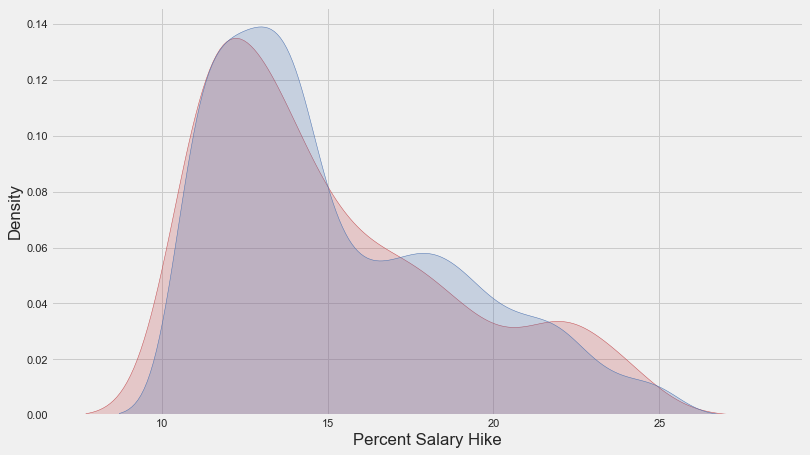

In [44]:
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['PercentSalaryHike'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(e_df_stayed['PercentSalaryHike'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Percent Salary Hike')

In [45]:
# Finding:
# F4.7.2 No significant impact seen due to PercentSalaryHike. No significant difference seen in Male/Female gender behavior

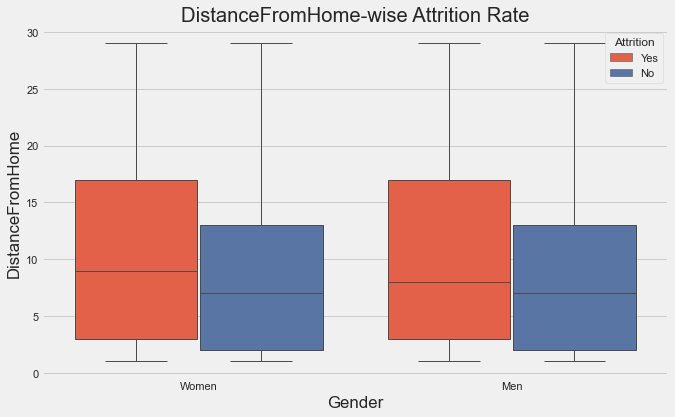

In [46]:
# E4.7.3 Check impact of DistanceFromHome 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.DistanceFromHome, hue=df_train.Attrition, palette=["C1", "b"],linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('DistanceFromHome-wise Attrition Rate')
plt.show()

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

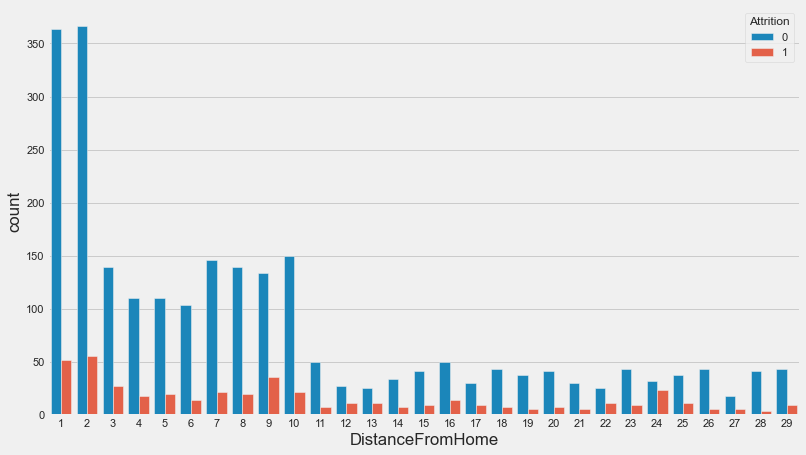

In [47]:
plt.figure(figsize=[12,7])
sns.countplot(x = 'DistanceFromHome', hue = 'Attrition', data = encoded_df)

Text(0.5, 0, 'Distance From Home')

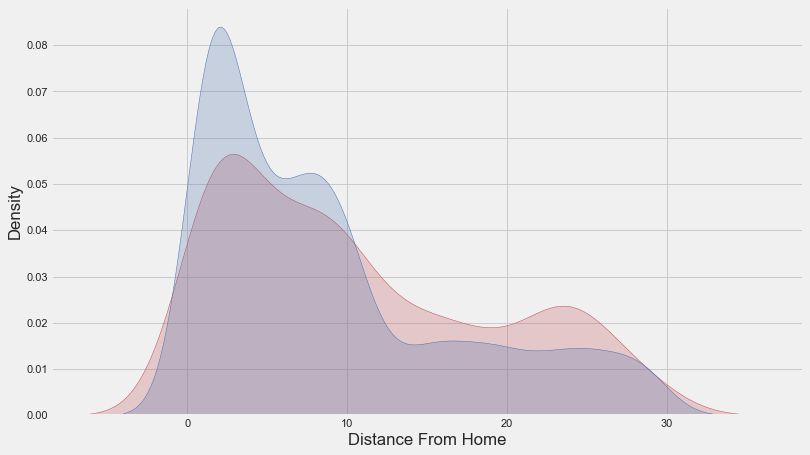

In [48]:
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(e_df_stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

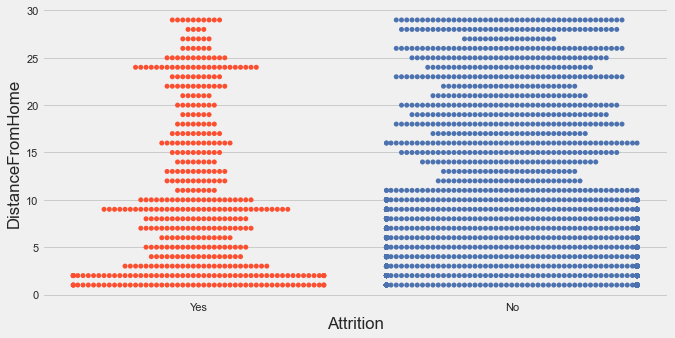

In [49]:
plt.figure(figsize = (10,5))
plt.style.use('fivethirtyeight')
#plt.subplot(131)
sns.swarmplot(x="Attrition", y="DistanceFromHome", data=df_train, palette=["C1", "b"])

In [50]:
# Findings:
# F4.7.3.1 No significant impact seen due to Distance from home. More Employees live closer to home   
# F4.7.3.2 No significant difference in Male/Female gender behavior

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

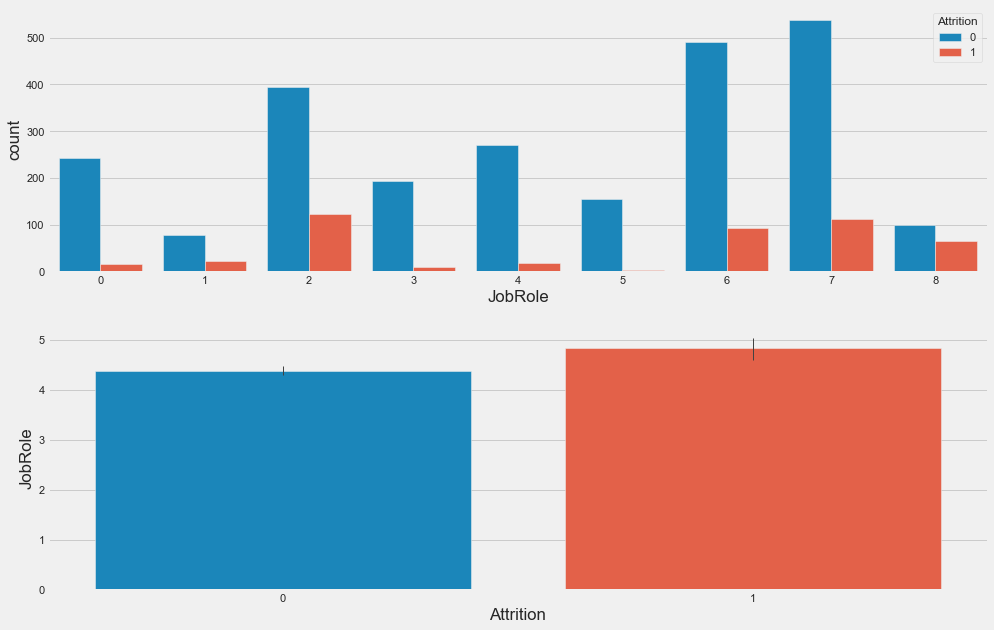

In [51]:
# E4.7.4 Check impact of JobRole 
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = encoded_df)
plt.subplot(212)
sns.barplot(y = 'JobRole', x = 'Attrition', data=encoded_df, errwidth=1)

In [52]:
# Findings: 
# F4.7.4 Sales representative shows the highest attrition rate

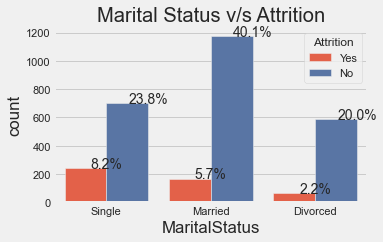

In [52]:
# E4.7.5 Check impact of MaritalStatus 
plt.figure(figsize=[5,3])
total = float(len(df_train))
ax = sns.countplot(x = 'MaritalStatus', hue = 'Attrition', palette=["C1", "b"], data = df_train)
for p in ax.patches:
    percentage = '{:0.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
ax.set_xticklabels(('Single', 'Married', 'Divorced'))
plt.title('Marital Status v/s Attrition')
plt.show()

In [53]:
# Findings: 
# F4.7.5 Marital Status Single shows the highest attrition rate

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

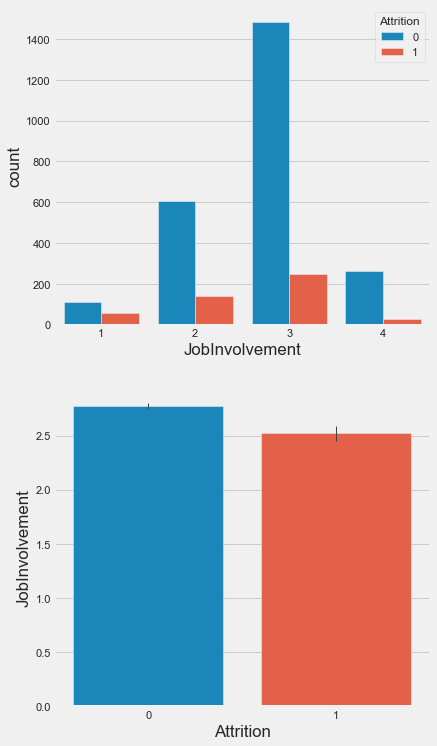

In [54]:
# E4.7.6 Check impact of JobInvolvement and spread of attrition across Jobinvolvement
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = encoded_df)
plt.subplot(212)
sns.barplot(y = 'JobInvolvement', x = 'Attrition', data=encoded_df, errwidth=1)

In [55]:
# Findings: 
# F4.7.6 Job involvement 4 has lowest rate of attrition and Jobinvolvement of 1 has highest rate of attrition

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

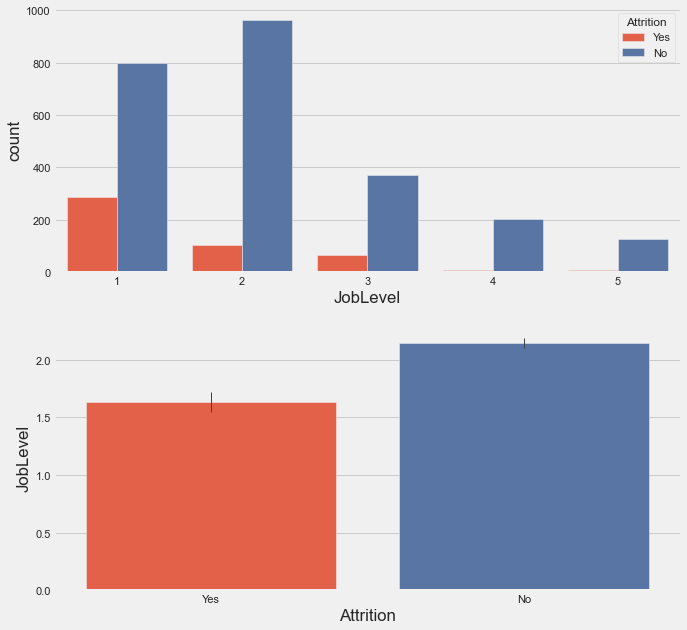

In [56]:
# E4.7 Check impact of JobLevel 
plt.figure(figsize=[10,10])
plt.subplot(211)
sns.countplot(x = 'JobLevel', hue = 'Attrition',palette=["C1", "b"], data = df_train)
plt.subplot(212)
sns.barplot(y = 'JobLevel', x = 'Attrition', palette=["C1", "b"],data=df_train, errwidth=1)

In [57]:
# Findings: 
# F4.7.7 JobLevel has lowest rate of attrition at levels 4 and 5

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

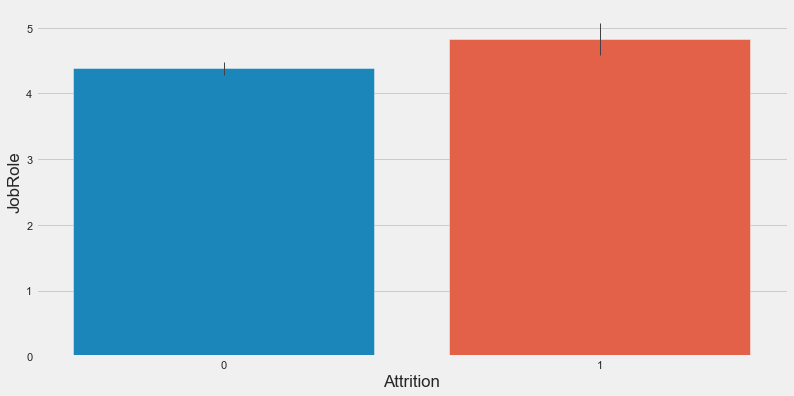

In [58]:
# E4.7.8 Check impact of JobRole 
plt.figure(figsize=(12,6))
sns.barplot(y = 'JobRole', x = 'Attrition', data=encoded_df, errwidth=1)

In [59]:
# Findings: 
# F4.7.8 Sales Representative has highest rate of attrition at levels 4 and 5

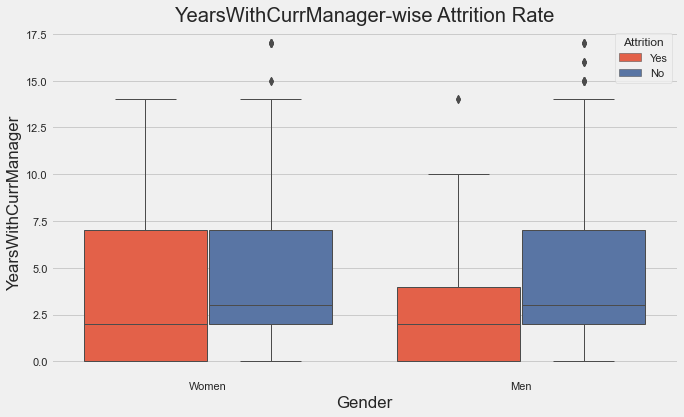

In [60]:
# E4.7.9 Check impact of YearsWithCurrManager 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.YearsWithCurrManager, hue=df_train.Attrition, palette=["C1", "b"],linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('YearsWithCurrManager-wise Attrition Rate')
plt.show()

Text(0.5, 0, 'Years With Current Manager')

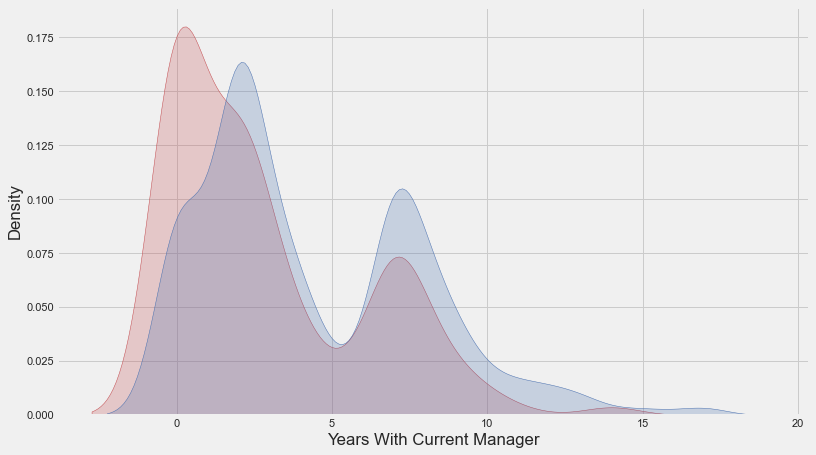

In [61]:
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(e_df_stayed['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

In [62]:
# F4.7.9.1 More people leave during initial 1-2 years
# F4.7.9.2 second peak around 7 years

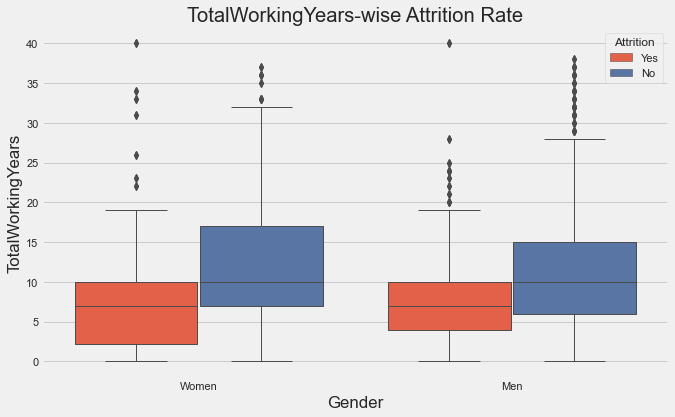

In [63]:
# E4.7.10 Check impact of TotalWorkingYears 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.TotalWorkingYears, hue=df_train.Attrition, palette=["C1", "b"],linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('TotalWorkingYears-wise Attrition Rate')
plt.show()

Text(0.5, 0, 'Total Working Years')

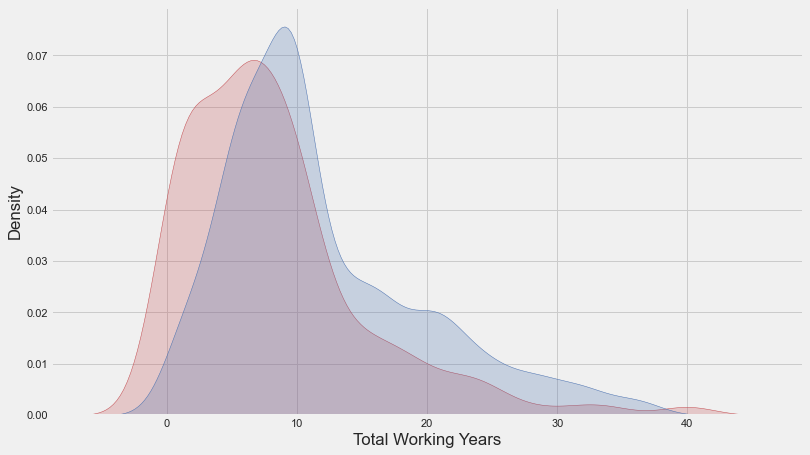

In [64]:
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(e_df_stayed['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

In [65]:
# Findings
# F4.7.10 More people leave during initial 1-2 years

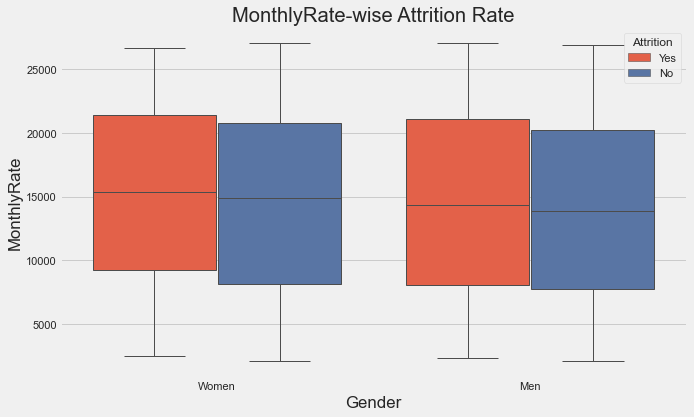

In [66]:
# E4.7.11 Check impact of MonthlyRate 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.MonthlyRate, hue=df_train.Attrition, palette=["C1", "b"],linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('MonthlyRate-wise Attrition Rate')
plt.show()

Text(0.5, 0, 'Monthly Rate')

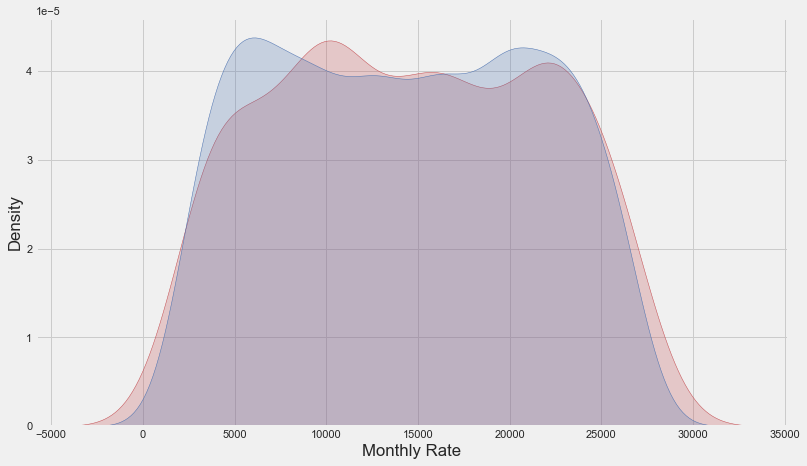

In [67]:
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['MonthlyRate'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(e_df_stayed['MonthlyRate'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Monthly Rate')

In [68]:
# findings
# F4.7.11 No significant impact

Text(0.5, 0, 'Daily Rate')

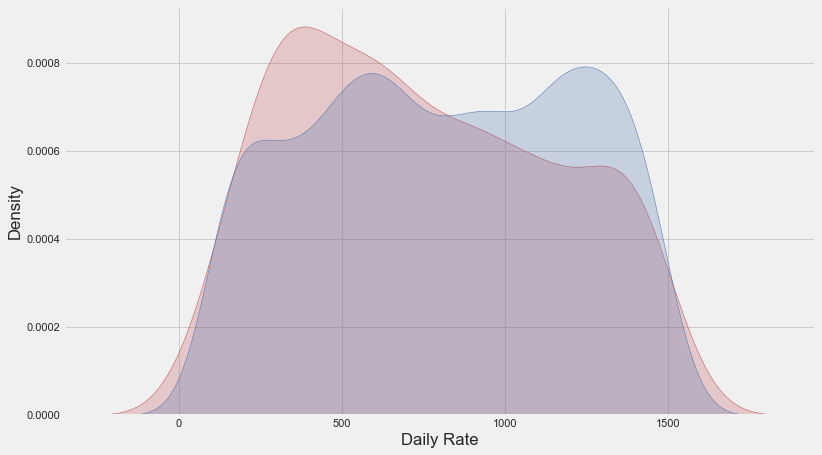

In [69]:
# E4.7.12 Check impact of DailyRate 
plt.figure(figsize=(12,7))

sns.kdeplot(e_df_attrited['DailyRate'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(e_df_stayed['DailyRate'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Daily Rate')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

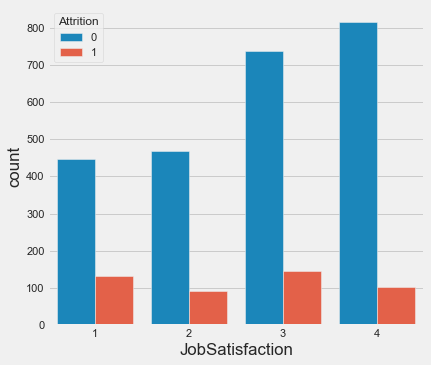

In [70]:
# E4.7.13 Check impact of JobSatisfaction and EnvironmentSatisfaction on attrition
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = encoded_df)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

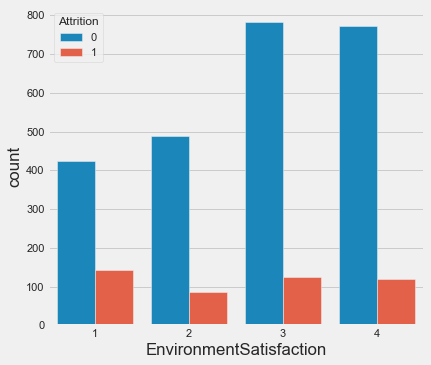

In [71]:
# E4.7.13 Check impact of JobSatisfaction and EnvironmentSatisfaction on attrition
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = encoded_df)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

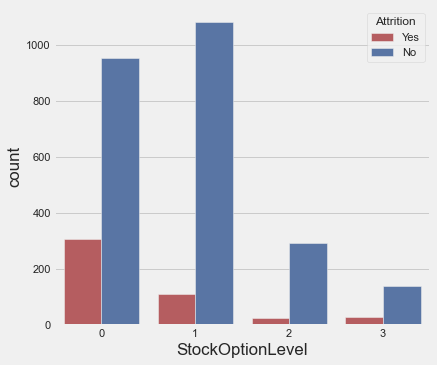

In [72]:
# E4.7.13 Check impact of StockOptionLevel on attrition
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'StockOptionLevel', hue = 'Attrition', data = df_train, palette=("r","b"))

In [73]:
# Findings
    # F4.7.11 'MonthlyRate': attrition seems to happen at every level regardless of employee hourly/monthly rate.
    # F4.7.12 'DailyRate': Rate of employees who stayed is higher
    # F4.7.13 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally  more satisfied with their jobs
    # F4.7.13 'StockOptionLevel': Employees who have higher stock option level show low attrition numbers however 

### E4.8 Bivariate Analysis

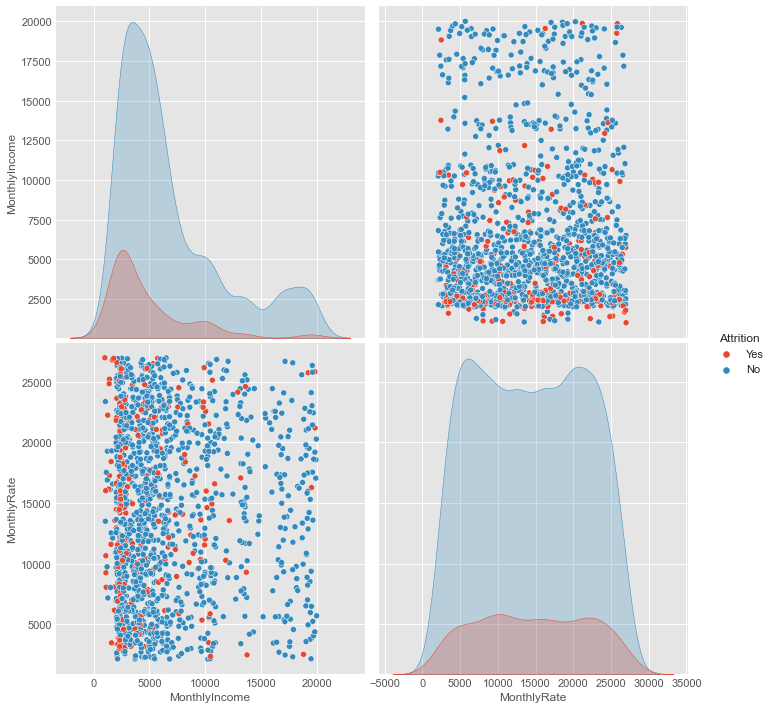

In [74]:
# E4.8.1 Checking MonthlyRate vs. Monthly Income
plt.style.use('ggplot')
g = sns.pairplot(df_train, vars=["MonthlyIncome", "MonthlyRate"],hue="Attrition",size=5)

In [75]:
# F4.8.1 MonthlyRate distribution is equally spread across MonthlyIncome and same with Attrition. No significant observations.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

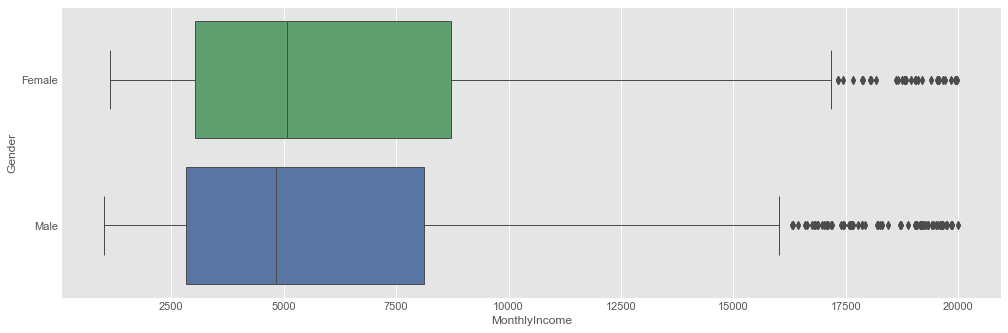

In [76]:
# E4.8.2 Checking Gender vs. Monthly Income
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', palette=["g", "b"],data = df_train, linewidth=1.0)

In [77]:
# F4.8.2 No significant observation

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

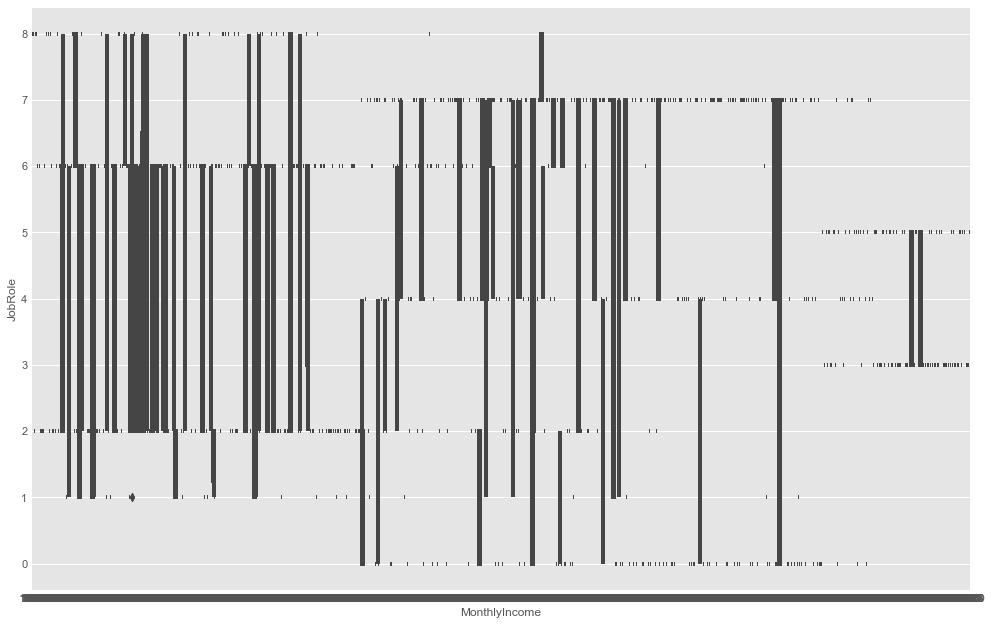

In [78]:
# E4.8.2a Checking monthly income vs. job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = encoded_df)

In [79]:
# F4.8.2a.1 Sales Rep MonthlyIncome is a narrow band buthas outliers
# F4.8.2a.2 Sales Executive MonthlyIncome has high variation

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

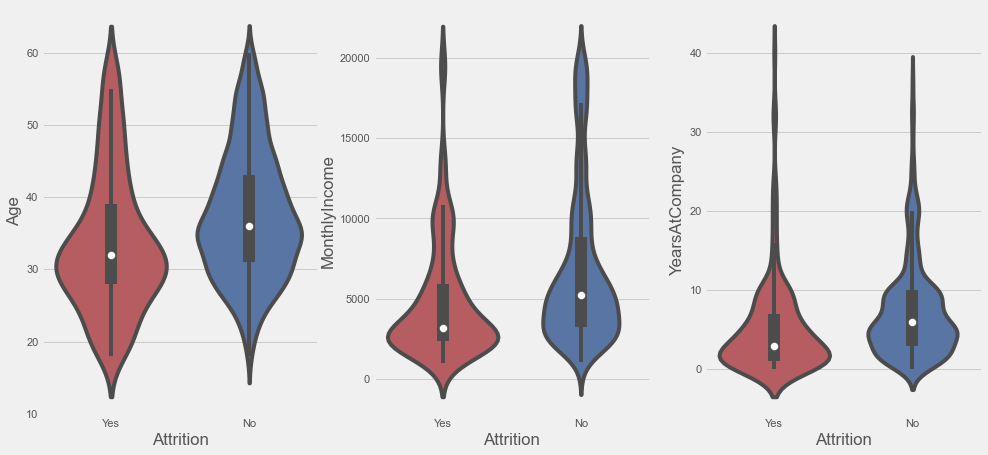

In [81]:
# E4.8.3 Checking Attrition vs. Age, monthlyIncome, YearsAtCompany
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
plt.subplot(131)
sns.violinplot(x="Attrition", y="Age", data=df_train, palette=["r", "b"])
plt.subplot(132)
sns.violinplot(x="Attrition", y="MonthlyIncome", data=df_train, palette=["r", "b"])
plt.subplot(133)
sns.violinplot(x="Attrition", y="YearsAtCompany", data=df_train, palette=["r", "b"])

In [82]:
# F4.8.3.1 Employees within the age band of 25-35 attrited at a huge rate
# F4.8.3.2 Employees who were receiving less monthly income(2500-5000) attrited
# F4.8.3.3 Employees who had less working years(0-5) in the company attrited

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

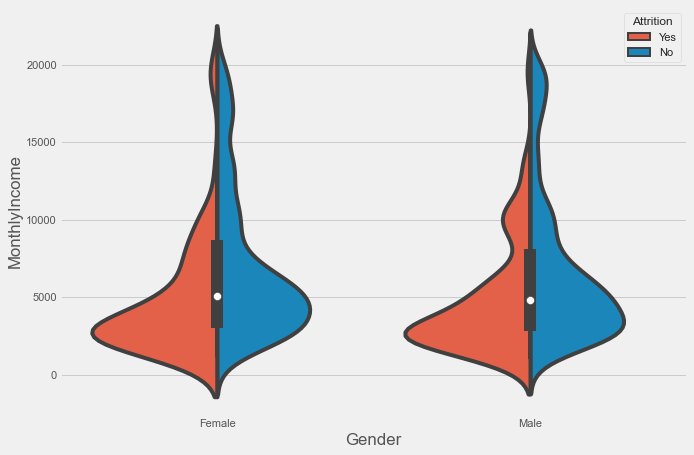

In [83]:
# E4.8.4 Checking Gender v/s monthlyIncome
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=df_train, palette=["C1", "C6"])

In [84]:
# F4.8.4 Both the genders are at the same rate in income and  attrition 

<AxesSubplot:xlabel='Gender', ylabel='MonthlyRate'>

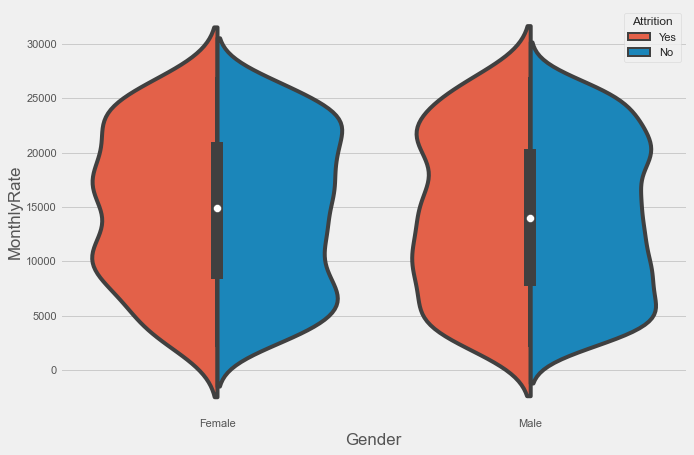

In [85]:
# E4.8.5 Checking Gender v/s monthlyRate
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyRate',hue='Attrition',split=True,data=df_train, palette=["C1", "C6"])

In [86]:
# F4.8.5 Both the genders are at the same rate in MonthlyRate and  attrition 

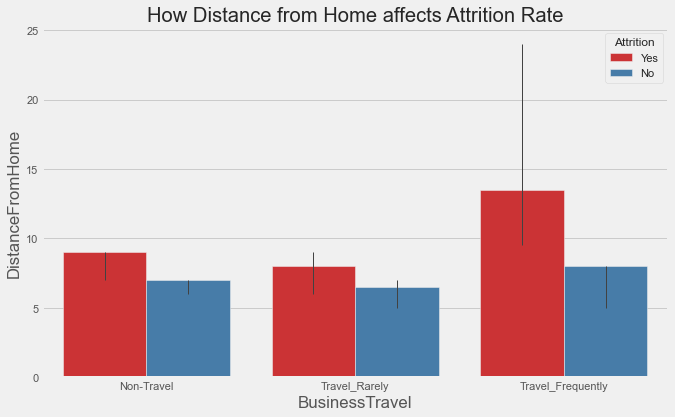

In [87]:
# E4.8.6 Checking how Distance from home affects Attrition Rate. 
plt.figure(figsize=(10, 6))
plt.title('How Distance from Home affects Attrition Rate')
ax = sns.barplot(x = df_train.BusinessTravel , y = df_train.DistanceFromHome, errwidth=1, 
                 estimator = np.median, hue = df_train.Attrition, palette='Set1')
ax.set_xticklabels(('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'))
plt.show()

In [88]:
# F4.8.6 Atttition Rate is higher in Non-Travellers who stay far from office

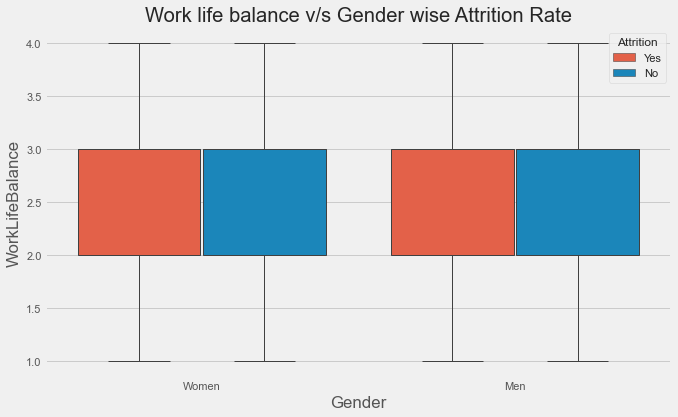

In [89]:
# E4.8.7 Checking how WorkLifeBalance affects Attrition Rate in combination with different factors 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_train.Gender, y=df_train.WorkLifeBalance, hue=df_train.Attrition, palette=["C1", "C6"], linewidth=1.0)
ax.set_xticklabels(('Women', 'Men'))
plt.title('Work life balance v/s Gender wise Attrition Rate')
plt.show()

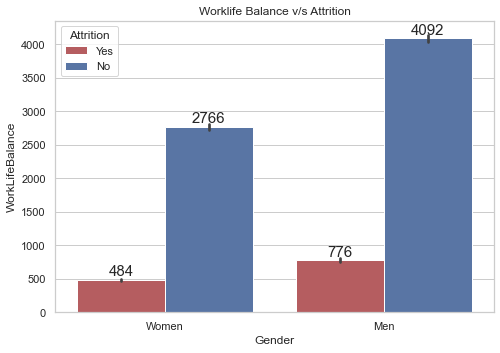

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.barplot(x = df_train.Gender , y = df_train.WorkLifeBalance, estimator = np.sum, hue = df_train.Attrition, palette=["r", "b"])
for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
                va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax.set_xticklabels(('Women', 'Men'))
plt.title('Worklife Balance v/s Attrition')
plt.show()

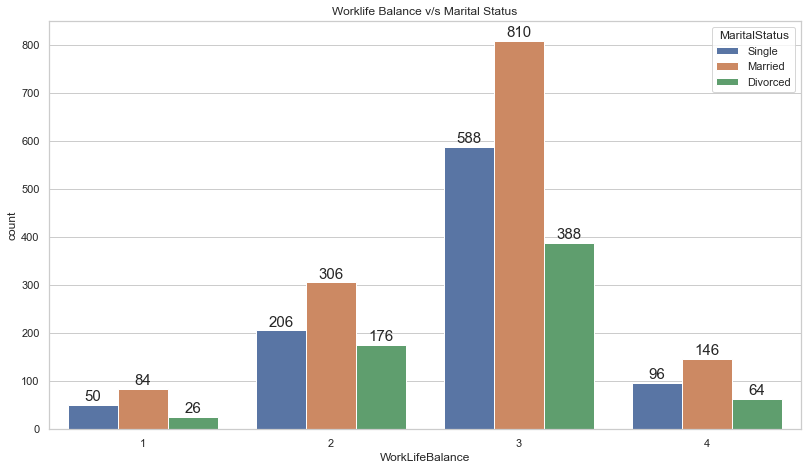

In [91]:
plt.figure(figsize=[12,7])
ax=sns.countplot(x = 'WorkLifeBalance', hue = 'MaritalStatus', data = df_train)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
                va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax.set_xticklabels(('1','2','3','4'))
plt.title('Worklife Balance v/s Marital Status')
plt.show()

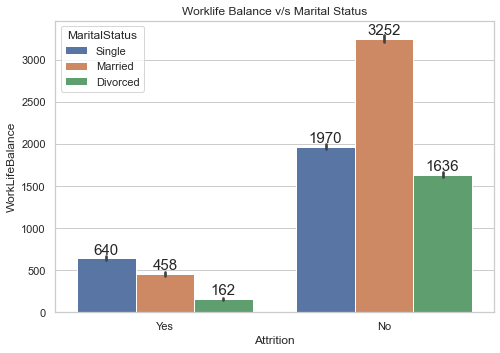

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.barplot(x = df_train.Attrition , y = df_train.WorkLifeBalance, estimator = np.sum, 
                 hue = df_train.MaritalStatus)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
                va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax.set_xticklabels(('Yes','No'))
plt.title('Worklife Balance v/s Marital Status')
plt.show()

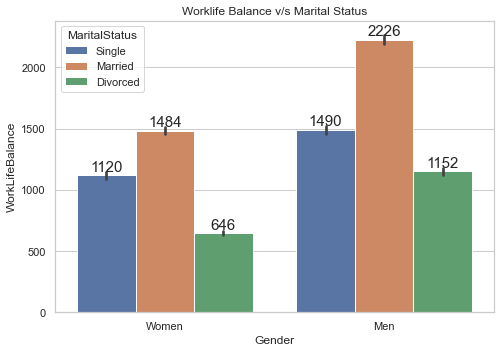

In [93]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.barplot(x = df_train.Gender , y = df_train.WorkLifeBalance, estimator = np.sum, hue = df_train.MaritalStatus)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
                va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax.set_xticklabels(('Women','Men'))
plt.title('Worklife Balance v/s Marital Status')
plt.show()

In [94]:
# F4.8.7.1  No significant diference between Genders on WorkLifebalance score
# F4.8.7.2  WorkLifeBalance score for Married couples is higher
# F4.8.7.3  Divorced people have a lowest attrition count. 

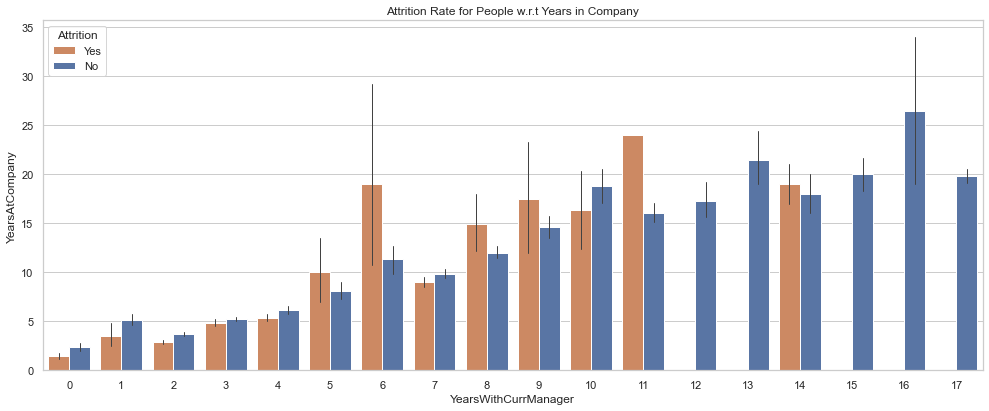

In [95]:
# E4.8.8 Check YearsWithCurrManager v/s Attrition
plt.figure(figsize=(15, 6))
plt.title('Attrition Rate for People w.r.t Years in Company')
ax = sns.barplot(x=df_train.YearsWithCurrManager, y=df_train.YearsAtCompany, 
                 hue=df_train.Attrition, orient='v', palette=['C1','b'], errwidth=1)
plt.show()

In [96]:
# F4.8.8 Employees staying with their current Managers for more than 5 years have more possibilites of switching jobs than their possibility of switching jobs before 5 years¶

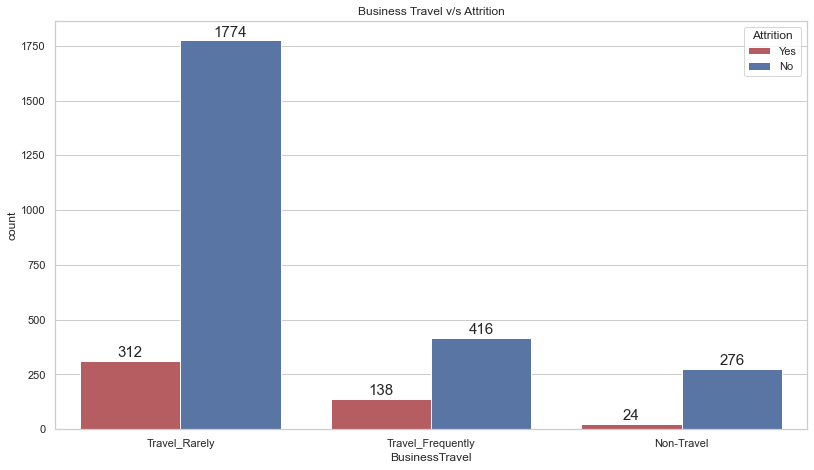

In [97]:
# E4.8.9 Check Business Travel v/s Attrition
plt.figure(figsize=[12,7])
ax=sns.countplot(x = 'BusinessTravel', hue = 'Attrition', palette=('r','b'),data = df_train)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
                va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.title('Business Travel v/s Attrition')
plt.show()

1176.0
1764.0


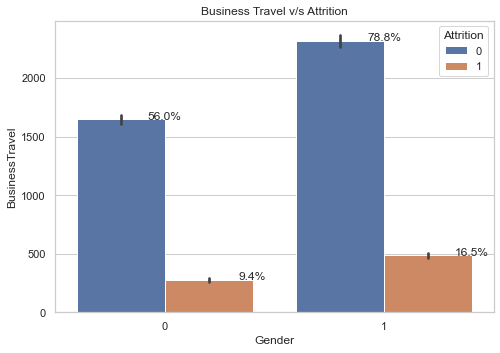

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

totalM= float(df_train[df_train.Gender == "Male"].Gender.value_counts())
totalF= float(df_train[df_train.Gender == "Female"].Gender.value_counts())
print(totalF)
print(totalM)

ax = sns.barplot(x = encoded_df.Gender , y = encoded_df.BusinessTravel, estimator = np.sum, 
                 hue = encoded_df.Attrition, palette=["b", "C1"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/(totalM+totalF))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#ax.set_xticklabels(('Women', 'Men'))
plt.title('Business Travel v/s Attrition')
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='BusinessTravel'>

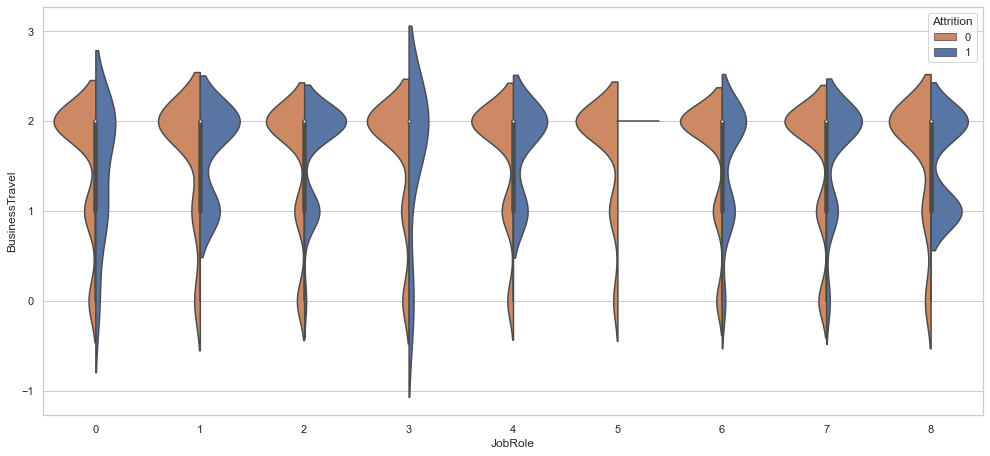

In [99]:
# E4.8.4 Checking Gender v/s monthlyIncome
fig,ax = plt.subplots(figsize=(15,7))
sns.violinplot(x='JobRole', y='BusinessTravel',hue='Attrition',split=True,data=encoded_df, palette=["C1", "b"])

In [100]:
# Check Worklife Balance v/s Marital Status

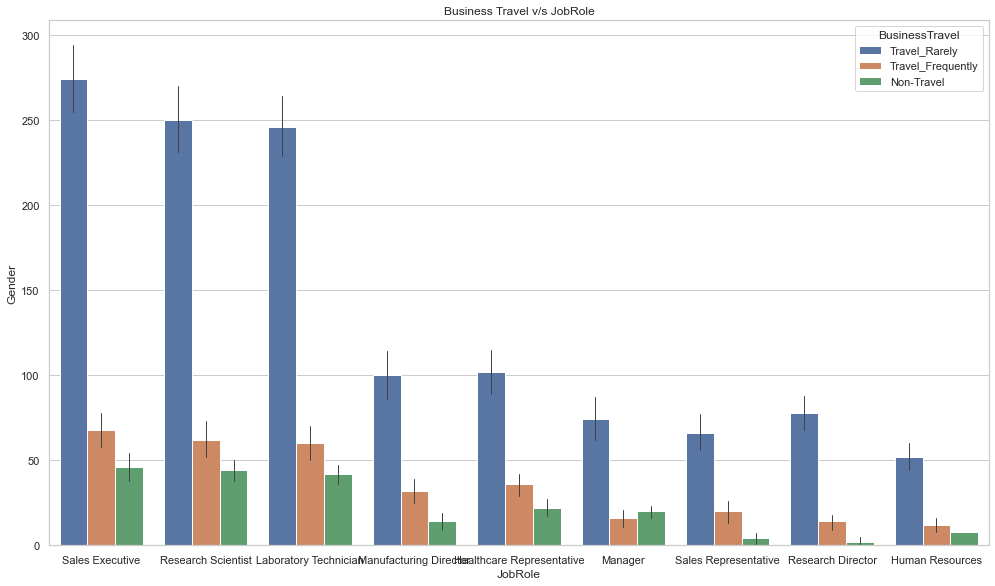

In [101]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,9))
sns.barplot(x = df_train.JobRole , y = encoded_df.Gender, estimator = np.sum, 
                hue = df_train.BusinessTravel, errwidth=1)
#for bar in ax.patches:
#    ax.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', 
#                va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.title('Business Travel v/s JobRole')
plt.show()

In [102]:
# F4.8.9 Employees having frequent business travel have higher attrition.

## 5.0 Encoding Categorical variables 
## 6.0 Data Treatment (Normalizing and Scaling)

In [103]:
# Encoding and normalization already performed in E4.5

In [104]:
#len(encoded_df)
#encoded_df.shape
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   Attrition                 2940 non-null   int64
 2   BusinessTravel            2940 non-null   int64
 3   DailyRate                 2940 non-null   int64
 4   Department                2940 non-null   int64
 5   DistanceFromHome          2940 non-null   int64
 6   Education                 2940 non-null   int64
 7   EducationField            2940 non-null   int64
 8   EnvironmentSatisfaction   2940 non-null   int64
 9   Gender                    2940 non-null   int64
 10  HourlyRate                2940 non-null   int64
 11  JobInvolvement            2940 non-null   int64
 12  JobLevel                  2940 non-null   int64
 13  JobRole                   2940 non-null   int64
 14  JobSatisfaction           2940 non-null 

## EDA Summary:

#### 1.0 Basic Data Exploration (Load data, check data info)
    File Name: HR_Employee_Attrition_Data.csv
    2940 entries, 0 to 2939, Data columns (total 35 columns): dtypes: int64(26), object(9)

#### 2.0 Data priliminary check : Findings summary
    F2.0 No missing data / Null values found.

#### 3.0 Data cleaning (Check data distribution, Remove duplicates, Drop singular and high missing value columns, remove outliers): Findings summary
    F3.1.1 Performance rating shows only 2 unique values against expected scale of 1-5. Bias need to be further investigated
    F3.1.2 Daily rate- hourly rate - monthly rate values 886 , 71 , 1427 need to check for inconsistency
    F3.1.3 EmployeeCount, Over18, StandardHours, have only single value.
    F3.2.1 drop 'EmployeeCount' , 'Standardhours' and 'Over18' since there is no variation
    F3.2.2 drop 'EmployeeNumber' as it is identifier and not feature/variable wrt target
    F3.2.3 Distancefromhome, YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager are long tailed. check for outliers
    F3.3 Outliers seen in MonthlyIncome, YearsAtCompany, YearsSinceLastPromotion. Need to cross check
    F3.4 need to check if low monthly income is a factor for attrition
    F3.5.1 "Employee count", "over 18" and "Standard hours" have no variation or single value and can be dropped
    F3.5.2 Can Drop 'Employee Number" as it is unique identifier

#### 4.0 Variables Analysis (Univariate & Bivariate Analysis, feature selection, drop corelated columns)
    F4.1.1 Job level is strongly correlated with total working hours
    F4.1.2 Monthly income is strongly correlated with Job level
    F4.1.3 Monthly income is strongly correlated with total working hours
    F4.1.4 Age is strongly correlated with monthly income
    F4.2.1 "Job level" and "MonthlyIncome" highly correlated. Can Drop one column
    F4.2.2 Can Drop "years at company" - correlated with "years at current role" and "years with CurrentManager"
    F4.2.3 Check total working years and  monthly income  correlation
    F4.2.4 Check salary hike and performance rating correlation
    F4.2.5 Check years with current manager and  years since last promotion correlation 
    F4.2.6 Check age and monthly income correlation
    F4.3 Columns "Over18","EmployeeCount", "StandardHours", “EmployeeNumber" dropped.
    F4.4.1 If use 'Accuracy' as a performance metric for Attrition then even if all cases are predicted as 0, still model will have 84% accuracy!! prediction of 1 as 1 will be important here.
    F4.4.2 make sure that the 80:20 split has 84% of ‘0’s and 16% of ‘1’s in both output datasets
    F4.4.3 Use stratified sample split for train and test data and specify Stratified if cross validation is used
    F4.7.1.1 “Age”: mean age of the employees who attrited is lower compared to who did not attrite
    F4.7.1.2 “Age”: Employees within the age band of 25-35 attrited at a huge rate
    F4.7.1.3 “Age”: No significant difference in Male/Female gender behavior, they tend to behave same
    F4.7.2 “PercentSalaryHike”: No significant impact seen due to PercentSalaryHike. No significant difference seen in Male/Female gender behavior
    F4.7.3.1 “DistanceFromHome”: No significant impact seen due to Distance from home. More Employees live closer to home   
    F4.7.3.2 “DistanceFromHome”: No significant difference in Male/Female gender behavior
    F4.7.4 “JobRole”: Sales representative shows the highest attrition rate
    F4.7.5 “MaritalStatus”:Status Single shows the highest attrition rate
    F4.7.6 “JobInvolvement”: Score of 4 has lowest rate of attrition and Jobinvolvement of 1 has highest rate of attrition
    4.7.7 “JobLevel”: has lowest rate of attrition at levels 4 and 5
    F4.7.8 “JobRole”: Sales Representative has highest rate of attrition at levels 4 and 5
    F4.7.9.1 “YearsWithCurrManager”: More people leave during initial 1-2 years
    F4.7.9.2 “YearsWithCurrManager”: second peak around 7 years
    F4.7.10 “TotalWorkingYears”: More people leave during initial 1-2 years
    F4.7.11 'MonthlyRate': attrition seems to happen at every level regardless of employee hourly/monthly rate.
    F4.7.12 'DailyRate': Rate of employees who stayed is higher
    F4.7.13 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisfied with their jobs
    F4.7.13 'StockOptionLevel': Employees who have higher stock option level show low attrition numbers however 
    F4.8.1 MonthlyIncome & MonthlyRate : distribution is equally spread across MonthlyIncome and same with Attrition. No significant observations. 
    F4.8.2 Gender vs. Monthly Income: No significant observation
    F4.8.2a.1 monthly income vs. job role: Sales Rep MonthlyIncome is a narrow band but has outliers
    F4.8.2a.2 monthly income vs. job role: Sales Executive MonthlyIncome has high variation
    F4.8.3 Attrition vs. Age, monthlyIncome, YearsAtCompany: 
    F4.8.3.1 Employees within the age band of 25-35 attrited at a huge rate
    F4.8.3.2 Employees who were receiving less monthly income(2500-5000) attrited
    F4.8.3.3 Employees who had less working years(0-5) in the company attrited
    F4.8.4 Gender v/s monthlyIncome: Both the genders are at the same rate in income and  attrition 
    F4.8.5 MonthlyRate and  attrition : Both the genders are at the same rate in MonthlyRate and  attrition 
    F4.8.7 WorkLifeBalance affects Attrition Rate:
    F4.8.7.1  No significant difference between Genders on WorkLifebalance score
    F4.8.7.2  WorkLifeBalance score for Married couples is higher
    F4.8.7.3  Divorced people have a lowest attrition count. 
    F4.8.8 YearsWithCurrManager : Employees staying with their current Managers for more than 5 years have more possibilities of switching jobs than their possibility of switching jobs before 5 years¶
    F4.8.9 Business Travel v/s Gender: Employees having frequent business travel have higher attrition. No significant difference seen in Gender

#### 5.0 Encoding Categorical variables 
    F5.0 Encoded columns Attrition, Gender, BusinessTravel, Department, EducationField, MaritalStatus, OverTime, JobRole

#### 6.0 Data Treatment (Normalizing and Scaling)    
    F6.0 Normalized columns Attrition, Gender, BusinessTravel, Department, EducationField, MaritalStatus, OverTime, JobRole


x------------------x--------------------x---------------------x--------------------x-----------------x---------------------x--------------------x-----------------x

## ML Model building

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [106]:
x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

### Decision Tree

In [215]:
fit_rf = DecisionTreeClassifier(random_state=1)
np.random.seed(1)
# start = time.time()

param_dist = {'max_depth': [4, 5, 6, 7, 8, 9],
              'min_samples_leaf':[100,200,70, 30, 20],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 70}


In [216]:
model_dt_2 = DecisionTreeClassifier(random_state=1, 
                                    max_depth=4, 
                                    criterion = 'entropy', 
                                    min_samples_leaf=70 )
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8626700680272109
Testing score:  0.8452380952380952


In [217]:
#Decision tree

model_dt = DecisionTreeClassifier(random_state=1, 
                                    max_depth=7, 
                                    criterion = 'entropy', 
                                    min_samples_leaf=70 )
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [218]:
predictions = model_dt.predict(x_test)

# Model Accuracy
print (model_dt.score(x_test, y_test))
y_actual_result = y_test[0]

0.8452380952380952


In [219]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [220]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7142857142857143


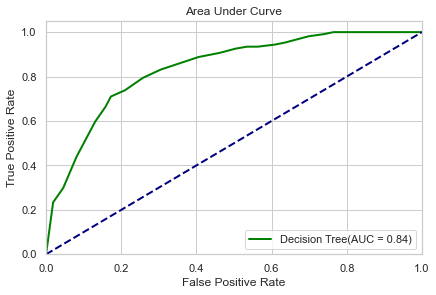

In [221]:

# Area Under the Curve 
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [222]:
print (confusion_matrix(y_test, predictions))

[[472   9]
 [ 82  25]]


In [223]:
accuracy_score(y_test, predictions)

0.8452380952380952

### Random Forrest

In [226]:
from sklearn.ensemble import RandomForestClassifier
# from urllib.request import urlopen 
# from sklearn.model_selection import KFold, cross_val_score
# plt.style.use('ggplot')
# pd.set_option('display.max_columns', 500)

In [227]:
fit_rf = RandomForestClassifier(random_state=303)

In [119]:
param_dist = {'max_depth': [4, 5, 6, 7, 8, 9],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': None}


In [120]:
# Set best parameters given by grid search 
#Best Parameters using grid search: when n_jobs is 1
#  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None}
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 9)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=None,
                       random_state=303)

In [121]:
### OOB rate

In [122]:

fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [123]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

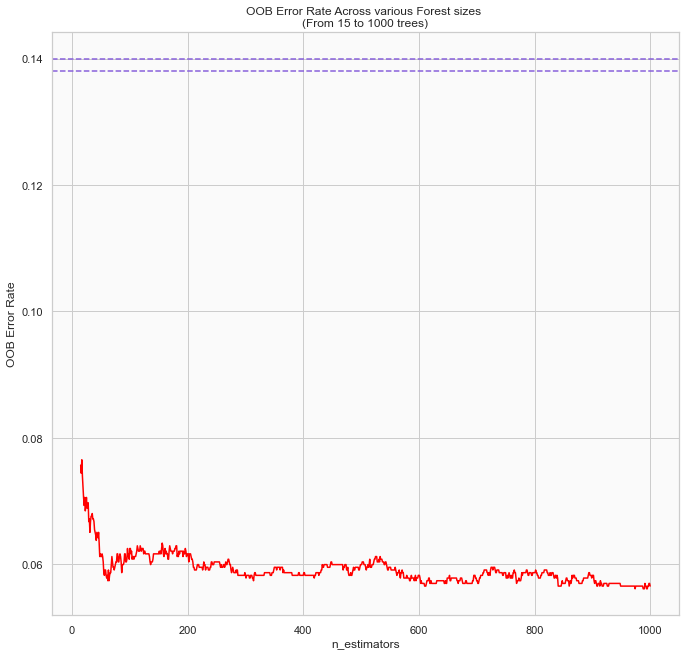

In [124]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.10, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [154]:
print('OOB Error rate for 625 trees is: {0:.5f}'.format(oob_series[625]))


OOB Error rate for 625 trees is: 0.05697


In [228]:
fit_rf.set_params(n_estimators=625,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=625, random_state=303)

In [229]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=625, random_state=303)

In [230]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [231]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [232]:

def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_fc('#fafafa') # get_fc
    plt.title('Feature importances for Random Forest Model\
    \nAttrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

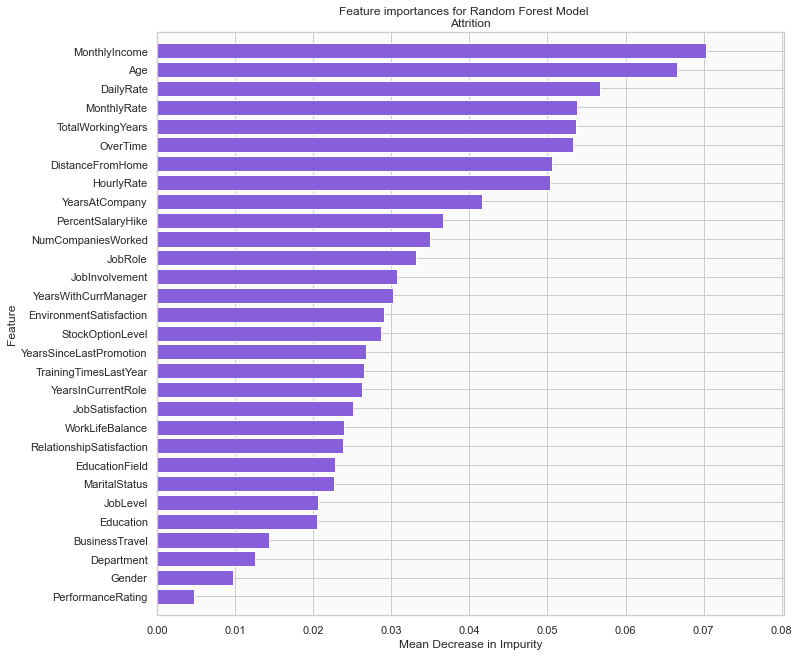

In [233]:
names_index = [i for i in df_train.columns if i != 'Attrition']
variable_importance_plot(importances_rf, indices_rf, names_index)

In [234]:
predictions_rf = fit_rf.predict(x_test)
print (confusion_matrix(y_test, predictions_rf))

[[481   0]
 [ 20  87]]


In [235]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.966


In [236]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0340


In [237]:
y_actual_result =0
for i in range(len(predictions_rf)):
    if(predictions_rf[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [238]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.9886363636363636


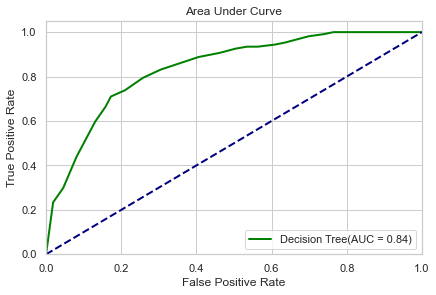

In [239]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### SVM

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [166]:
from sklearn.svm import SVC
from sklearn import metrics

In [167]:
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8979591836734694


In [168]:

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.858843537414966


In [169]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8996598639455783


In [170]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [171]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.9455589614136313


In [162]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 4, 'gamma': 0.05, 'kernel': 'poly'}


In [172]:
svc=SVC(kernel='poly',gamma=0.05, degree=4, C=0.9 )
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9421768707482994


In [240]:
predictions_svm = svc.predict(x_test)
print (confusion_matrix(y_test, predictions_svm))

[[477   4]
 [ 30  77]]


In [242]:
y_actual_result =0
for i in range(len(predictions_svm)):
    if(predictions_svm[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [243]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.9390243902439024


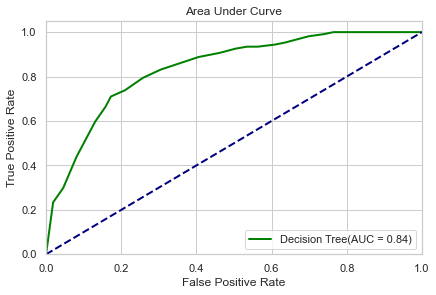

In [244]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

### Decision Tree : Accuracy = 0.842 , Recall = 0.714 , ROC AUC = 0.84

### Random Forrest : Accuracy = 0.966 , Recall = 0.988 , ROC AUC = 0.84

### SVM : Accuracy = 0.942 , Recall =0.939 , ROC AUC = 0.84

# Random Forrest is giving the best results